# Part 2. EDA and Inferential Stats

This section contains analysis on the raw data: 

Target variable: [insert #] data points of daily changes in stock price of six selected companies, which corresponds to the six influential business leaders
Features: raw tweets pulled from Tweeter.com from the business leaders
1. Elon Musk TSLA
2. Levie BOX
3. Jack TWTR
4. Benioff CRM
5. Richardbranson SPCE
6. JohnLegere TMUS

Purpose: 
1. To extract and clean stock and Tweeter data for model development preparation 
2. To determine features with significant relationship to the target variable (changes in stock price) 

In [3]:
import pandas_profiling

In [1]:
from utils import *
import warnings
warnings.simplefilter('ignore')

In [69]:
params = {'axes.titlesize':'15',
          'xtick.labelsize':'15',
          'ytick.labelsize':'15',
         'font.size' : '15.0'}

plt.rcParams.update(params)

sns.set()

In [5]:
tweet_stocks = pd.read_pickle('data/tweet_stocks.pkl')

The following table provides a description of the raw data. Here we can get basic statistics of the data and verify that data was pulled correctly. I also checked to ensure no duplicates were identified. 

In [7]:
report = tweet_stocks.profile_report()
report.to_file(output_file="data/tweet_stocks_report.html")

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [71]:
tweet_stocks.describe()

,mentions,hashtags,cashtags,video,photos,urls,thumbnail,replies_count,retweets_count,likes_count,number of tweets,price,percent change
count,11738.000000,11738.000000,11738.000000,11738.000000,11738.000000,11738.000000,11738.000000,11738.000000,11738.000000,1.173800e+04,11738.000000,11738.000000,11738.000000
mean,1.708809,1.374936,0.020361,1.622678,1.663145,1.566195,1.622678,1083.109303,2762.580508,2.608611e+04,5.683592,89.831395,0.000821
std,2.905497,2.798369,0.359647,2.280602,2.436413,1.947314,2.280602,5788.531288,14467.562896,1.206448e+05,7.062947,124.006808,0.019997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,7.190000,-0.179500
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,53.000000,3.900000e+02,1.000000,21.735000,-0.005426
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,78.000000,149.000000,9.715000e+02,3.000000,61.655001,0.000373
75%,2.000000,2.000000,0.000000,2.000000,3.000000,2.000000,2.000000,236.000000,439.000000,2.815750e+03,7.000000,94.464998,0.006740
max,53.000000,42.000000,16.000000,36.000000,25.000000,32.000000,36.000000,204414.000000,582467.000000,4.727301e+06,162.000000,891.380005,0.269045


In [72]:
tweet_stocks.duplicated(keep=False).any()

False

In [73]:
tweet_stocks.T.duplicated(keep=False).any()

True

In [74]:
tweet_stocks.T.duplicated(keep=False)

date                False
tweet               False
username            False
mentions            False
hashtags            False
cashtags            False
video                True
photos              False
urls                False
thumbnail            True
replies_count       False
retweets_count      False
likes_count         False
number of tweets    False
price               False
percent change      False
dtype: bool

In [75]:
tweet_stocks.drop('thumbnail', axis=1, inplace=True)

In [76]:
tweet_stocks.T.duplicated(keep=False).any()

False

Here we examine several business leaders / investors corresponding to different stock prices. For example, Tweets from Elon Musk is examined for impact against Tesla stock price changes. 

Note this model can be flexible to examine the relationship between any business leader and the corresponding stock value. Here we selected six study cases, since we expect each case to have unique characteristics or relationships. We also want to examine the combined impact on all six stock - think of it as a small portfolio. Although at this stage, the code and model was designed to analysis the impact of sentiment based on these six companies, it can be made flexible enough to support any companies or a mix of companies to construct a portfolio. 

The table below shows the number of data points associated with each of the six study cases. From the data count, we can identify that certain features with small data count, such as hastags for Levie, may not yield reliable test results. This will be useful in the later stage when we infer information from statistical testing. 

In [77]:
ceos_sum = tweet_stocks.groupby('username').sum()
ceos_mean = tweet_stocks.groupby('username').mean()

In [78]:
ceos_sum

,mentions,hashtags,cashtags,video,photos,urls,replies_count,retweets_count,likes_count,number of tweets,price,percent change
username,,,,,,,,,,,,
Benioff,3837,362,0,1999,2339,2696,63794,384674,1661480,4729,267299.770018,0.845123
JohnLegere,10125,12154,231,9840,10294,7301,607419,760187,4035226,36437,262774.584891,1.012667
elonmusk,286,19,0,667,653,776,10962588,28797783,288713032,11182,433582.023379,4.369655
jack,932,414,6,463,543,1095,792240,1691746,7243011,4962,45434.271697,1.679164
levie,99,11,2,145,144,164,40258,204086,1476453,1704,17607.383144,0.943642
richardbranson,4779,3179,0,5933,5549,6352,247238,588694,3069607,7700,27742.878298,0.792197


Similarly, the table below shows the mean of the data for each study case. At this stage, this is also useful for sense checking data values to ensure that development data was loaded correctly. 

In [79]:
ceos_mean

,mentions,hashtags,cashtags,video,photos,urls,replies_count,retweets_count,likes_count,number of tweets,price,percent change
username,,,,,,,,,,,,
Benioff,2.089869,0.197168,0.000000,1.088780,1.273965,1.468410,34.746187,209.517429,904.945534,2.575708,145.588110,0.000460
JohnLegere,3.021486,3.626977,0.068935,2.936437,3.071919,2.178753,181.264996,226.853775,1204.185616,10.873471,78.416767,0.000302
elonmusk,0.132592,0.008809,0.000000,0.309226,0.302735,0.359759,5082.331015,13350.849791,133849.342605,5.184052,201.011601,0.002026
jack,0.646325,0.287101,0.004161,0.321082,0.376560,0.759362,549.403606,1173.194175,5022.892510,3.441054,31.507817,0.001164
levie,0.104984,0.011665,0.002121,0.153765,0.152704,0.173913,42.691410,216.422057,1565.697773,1.806999,18.671668,0.001001
richardbranson,2.378795,1.582379,0.000000,2.953211,2.762071,3.161772,123.065207,293.028372,1527.927825,3.832753,13.809297,0.000394


# Distributions<a id='2.2_Data_Distributions'></a>

In this section we examine the distribution of the stock price changes. The purpose is to identify the appropriate distribution for statistical testing. 

Here I first defined functions that can make data visualization more efficient. 

In [81]:
username_list = list(tweet_stocks['username'].unique())
color_list = ['orange', 'green', 'blue', 'brown', 'red', 'pink']
stocks_list = ['TSLA', 'BOX', 'TWTR', 'CRM', 'SPCE', 'TMUS']

mapper = list(zip(username_list, stocks_list, color_list))

In [82]:
for user_stock_color in mapper:
    print(user_stock_color)

('elonmusk', 'TSLA', 'orange')
('levie', 'BOX', 'green')
('jack', 'TWTR', 'blue')
('Benioff', 'CRM', 'brown')
('richardbranson', 'SPCE', 'red')
('JohnLegere', 'TMUS', 'pink')


In [83]:
features = list(tweet_stocks.drop(labels = ['date', 'tweet', 'username', 'price', 'percent change'], axis=1))

The following table illustrates the development data. For example, Tweets from Elon Musk is reduced to several features, such as number of mentions, and corresponding to the value and percent change in the corresponding stock price.  

Before we proceed to the distribution analysis, we need to process the raw stock data to extract information.  Given stock price have daily volatility, here we begin to define what is a significant increase or decrease in stock value vs. noise (or normal day-to-day volaility), so that we can better observe the correlation between stock price changes and social media sentiment. 

Key assumption: 1 standard deviation is used to determine whether a change is signficant vs. noise. 

In [84]:
# Bin percent change into 'fall' (<-1SD), 'no change' (btwn -1SD and 1SD), and 'rise' (>1SD)
new_df = pd.DataFrame()
for user in username_list:
    df = tweet_stocks[tweet_stocks['username'] == user]
    bins = [df['percent change'].min()+(-.001), -1*df['percent change'].std(), df['percent change'].std(), df['percent change'].max()]
    df['bins'] = pd.cut(df['percent change'], bins=bins, labels=['drop', 'no change', 'rise'])
    new_df = new_df.append(df)
tweet_stocks = new_df    

The charts and tables below show the distribution of the stock prices changes, which is the target variable. Here we examined six study cases individually as well as the overall portfolio with all six selected cases. The distribution appears to resemble a normal distribution. We do not see significant skewness. This is useful for determine statistical tests suitable for the population. 

percent change 
 
 
 
 
 mean 
 0.000821 
 
 
 std 
 0.019997 
 
 
 min 
 -0.179500 
 
 
 25% 
 -0.005426 
 
 
 50% 
 0.000373 
 
 
 75% 
 0.006740 
 
 
 max 
 0.269045 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 317 
 0.027 
 
 
 btwn_0_1_std 
 9894 
 0.843 
 
 
 btwn_1_2_std 
 1286 
 0.11 
 
 
 over_2_std 
 558 
 0.048

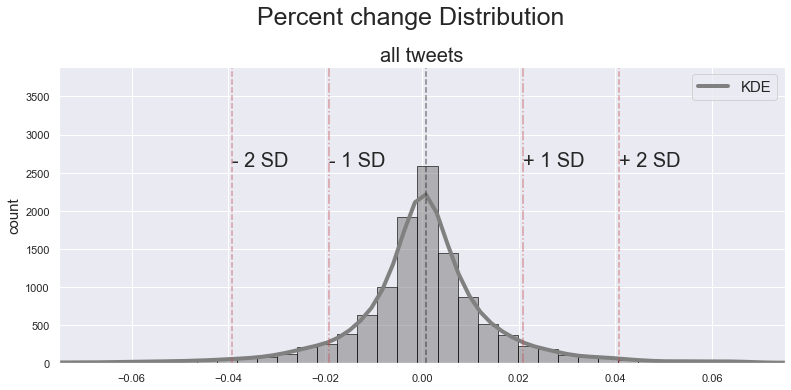

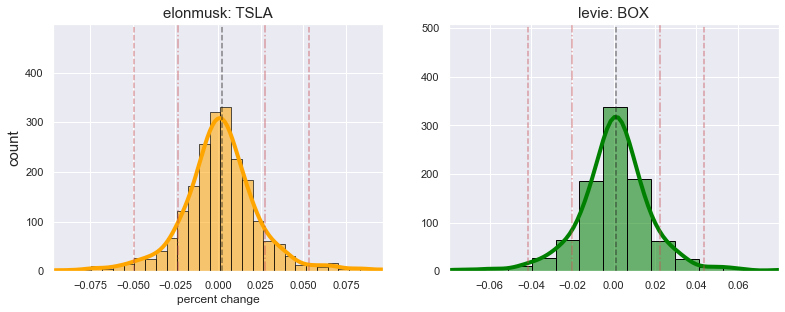

percent change 
 
 
 
 
 mean 
 0.002026 
 
 
 std 
 0.025820 
 
 
 min 
 -0.118469 
 
 
 25% 
 -0.010052 
 
 
 50% 
 0.001234 
 
 
 75% 
 0.013020 
 
 
 max 
 0.171549 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 3 
 0.001 
 
 
 btwn_0_1_std 
 1723 
 0.799 
 
 
 btwn_1_2_std 
 312 
 0.145 
 
 
 over_2_std 
 122 
 0.057 
 
 
 
 
 
 
 percent change 
 
 
 
 
 mean 
 0.001001 
 
 
 std 
 0.021255 
 
 
 min 
 -0.143807 
 
 
 25% 
 -0.007685 
 
 
 50% 
 0.000870 
 
 
 75% 
 0.009556 
 
 
 max 
 0.214807 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 19 
 0.02 
 
 
 btwn_0_1_std 
 764 
 0.81 
 
 
 btwn_1_2_std 
 135 
 0.143 
 
 
 over_2_std 
 44 
 0.047

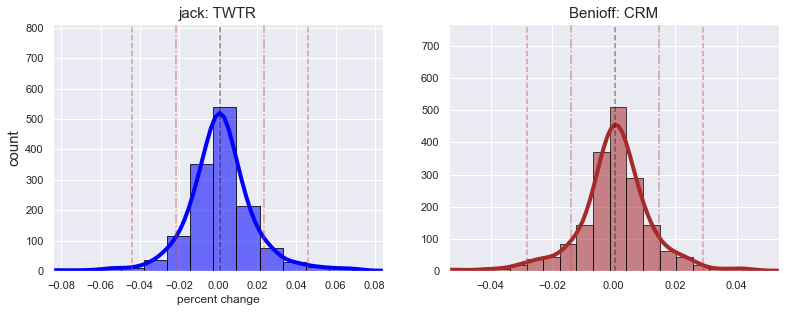

percent change 
 
 
 
 
 mean 
 0.001164 
 
 
 std 
 0.022442 
 
 
 min 
 -0.179500 
 
 
 25% 
 -0.007303 
 
 
 50% 
 0.000839 
 
 
 75% 
 0.009306 
 
 
 max 
 0.269045 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 27 
 0.019 
 
 
 btwn_0_1_std 
 1208 
 0.838 
 
 
 btwn_1_2_std 
 168 
 0.117 
 
 
 over_2_std 
 66 
 0.046 
 
 
 
 
 
 
 percent change 
 
 
 
 
 mean 
 0.000460 
 
 
 std 
 0.014293 
 
 
 min 
 -0.066184 
 
 
 25% 
 -0.004871 
 
 
 50% 
 0.000609 
 
 
 75% 
 0.006505 
 
 
 max 
 0.166212 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 19 
 0.01 
 
 
 btwn_0_1_std 
 1486 
 0.809 
 
 
 btwn_1_2_std 
 258 
 0.141 
 
 
 over_2_std 
 92 
 0.05

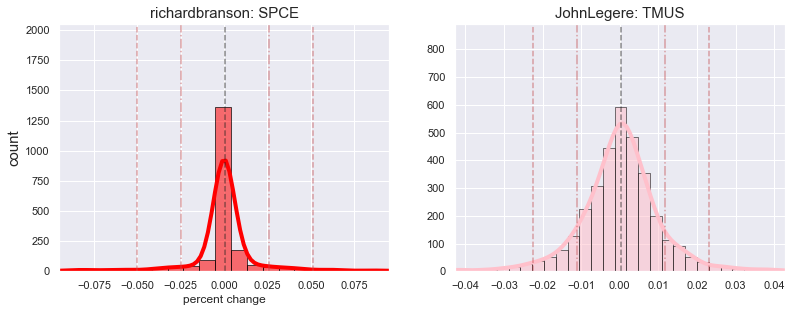

percent change 
 
 
 
 
 mean 
 0.000394 
 
 
 std 
 0.025351 
 
 
 min 
 -0.178809 
 
 
 25% 
 -0.002002 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.002484 
 
 
 max 
 0.232461 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 211 
 0.105 
 
 
 btwn_0_1_std 
 1755 
 0.874 
 
 
 btwn_1_2_std 
 139 
 0.069 
 
 
 over_2_std 
 115 
 0.057 
 
 
 
 
 
 
 percent change 
 
 
 
 
 mean 
 0.000302 
 
 
 std 
 0.011392 
 
 
 min 
 -0.068431 
 
 
 25% 
 -0.004949 
 
 
 50% 
 0.000307 
 
 
 75% 
 0.005462 
 
 
 max 
 0.108482 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 38 
 0.011 
 
 
 btwn_0_1_std 
 2662 
 0.794 
 
 
 btwn_1_2_std 
 522 
 0.156 
 
 
 over_2_std 
 167 
 0.05

In [85]:
df = tweet_stocks.copy()
feature = 'percent change'
sns.set()

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(13,12))
plt.subplot(211)


plot_univariate_dist(df, feature, color='grey', std_lab=True, plot_std=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(13,10))
    plt.subplot(221)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(222)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')

    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2


# Univariate Distributions and Bivariate Analysis 
In this section, we will examine the distribution of each feature (univariate analysis), as well as the relationship between features and the target variable (bivariate analysis). The tweet features are plotted in histograms, taking log tranformations as needed to better distributed the data. 

Several tests were conducted to examine the significance of the features against the target stock price changes. 

1. Spearman correlation between the feature and the percent change is taken so that transformations that don't change the rank ordering of the feature data (such as a log transformation) preserve the score. For example, if the larger number of Tweets tend to correlate with stock price significantly rising or falling, then we know that the feature of Tweets number will drive the stock to either rise or fall. Further sentiment analysis can then be done to determine the magnitude of rise or fall. The Spearman score ranges from -1 (negatively correlated) to 1 (positively correlated), with 0 describing no correlation between the feature and target variable, percent change.

2. T-test was conducted to see whether the mean of features correspoinding to either the rise and fall of the stock price changes is significantly different from the mean of features corresponding to no change. For example, if the number of tweets is a significant feature, then we expect to see that increase in the number of tweets drive either rise or fall in stock price, depending on the sentiment of what is being tweeted. 

mentions 
 
 
 
 
 mean 
 1.708809 
 
 
 std 
 2.905497 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 1.000000 
 
 
 75% 
 2.000000 
 
 
 max 
 53.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 5780 
 0.492 
 
 
 btwn_0_1_std 
 8996 
 0.766 
 
 
 btwn_1_2_std 
 1784 
 0.152 
 
 
 over_2_std 
 958 
 0.082

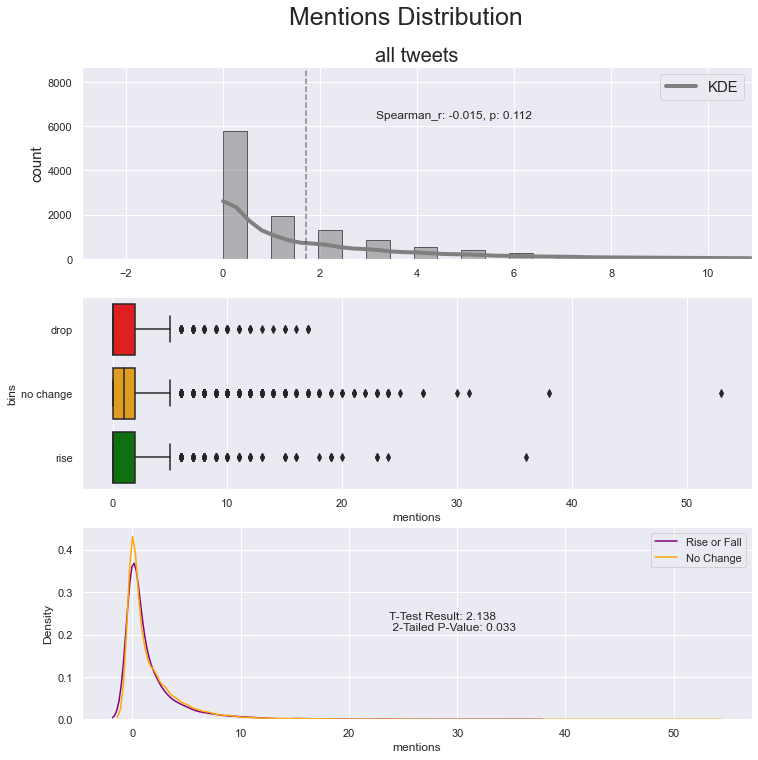

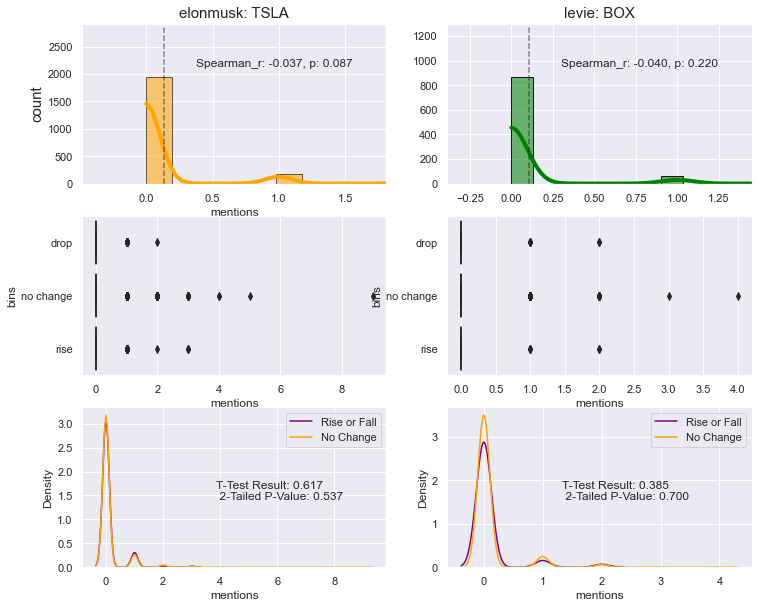

mentions 
 
 
 
 
 mean 
 0.132592 
 
 
 std 
 0.482571 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 9.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 1944 
 0.901 
 
 
 btwn_0_1_std 
 1944 
 0.901 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 213 
 0.099 
 
 
 
 
 
 
 mentions 
 
 
 
 
 mean 
 0.104984 
 
 
 std 
 0.386347 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 4.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 866 
 0.918 
 
 
 btwn_0_1_std 
 866 
 0.918 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 77 
 0.082

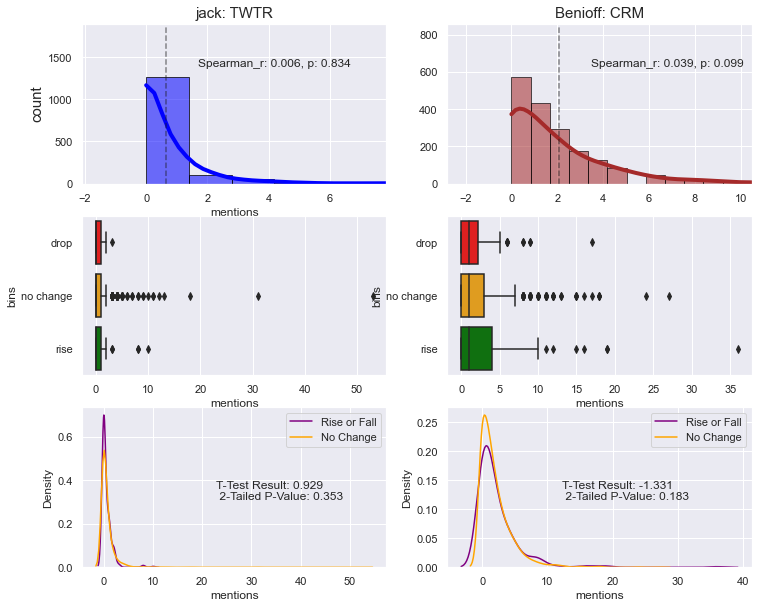

mentions 
 
 
 
 
 mean 
 0.646325 
 
 
 std 
 2.093847 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 1.000000 
 
 
 max 
 53.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 992 
 0.688 
 
 
 btwn_0_1_std 
 1361 
 0.944 
 
 
 btwn_1_2_std 
 54 
 0.037 
 
 
 over_2_std 
 27 
 0.019 
 
 
 
 
 
 
 mentions 
 
 
 
 
 mean 
 2.089869 
 
 
 std 
 2.793353 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 1.000000 
 
 
 75% 
 3.000000 
 
 
 max 
 36.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 572 
 0.312 
 
 
 btwn_0_1_std 
 1299 
 0.708 
 
 
 btwn_1_2_std 
 382 
 0.208 
 
 
 over_2_std 
 155 
 0.084

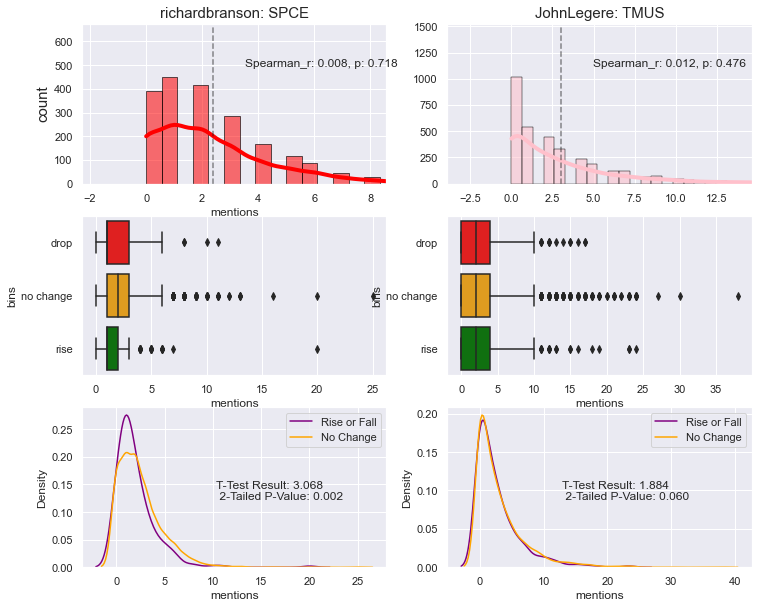

mentions 
 
 
 
 
 mean 
 2.378795 
 
 
 std 
 2.285492 
 
 
 min 
 0.000000 
 
 
 25% 
 1.000000 
 
 
 50% 
 2.000000 
 
 
 75% 
 3.000000 
 
 
 max 
 25.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 389 
 0.194 
 
 
 btwn_0_1_std 
 1255 
 0.625 
 
 
 btwn_1_2_std 
 452 
 0.225 
 
 
 over_2_std 
 302 
 0.15 
 
 
 
 
 
 
 mentions 
 
 
 
 
 mean 
 3.021486 
 
 
 std 
 3.900266 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 2.000000 
 
 
 75% 
 4.000000 
 
 
 max 
 38.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 1017 
 0.303 
 
 
 btwn_0_1_std 
 2331 
 0.696 
 
 
 btwn_1_2_std 
 661 
 0.197 
 
 
 over_2_std 
 359 
 0.107

In [88]:
df = tweet_stocks.copy()
feature = features[0]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(311)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=False, spearmanr=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)


plt.subplot(312)

sns.boxplot(data=df, x = feature, y = 'bins', palette=['red', 'orange', 'green'])

plt.subplot(313)
result, p_val = ttest_ind(df[feature][df['bins'] == 'no change'], df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], equal_var = True)
sns.kdeplot(df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], color='purple' ,alpha=0.3)
sns.kdeplot(df[feature][df['bins'] == 'no change'], color='orange', alpha=0.3)
plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.45, .15), xycoords='figure fraction')
plt.legend(['Rise or Fall', 'No Change'])

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(321)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=False, spearmanr=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(322)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=False, spearmanr=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')
    
    plt.subplot(323)
    sns.boxplot(data=df[df['username']==mapper[i][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    plt.subplot(324)
    sns.boxplot(data=df[df['username']==mapper[j][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    
    plt.subplot(325)
    
    df_usn = df[df['username']==mapper[i][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.25, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])
    
    plt.subplot(326)
    
    df_usn = df[df['username']==mapper[j][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.65, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])


    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2


hashtags 
 
 
 
 
 mean 
 1.374936 
 
 
 std 
 2.798369 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 2.000000 
 
 
 max 
 42.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 7273 
 0.62 
 
 
 btwn_0_1_std 
 9592 
 0.817 
 
 
 btwn_1_2_std 
 1264 
 0.108 
 
 
 over_2_std 
 882 
 0.075

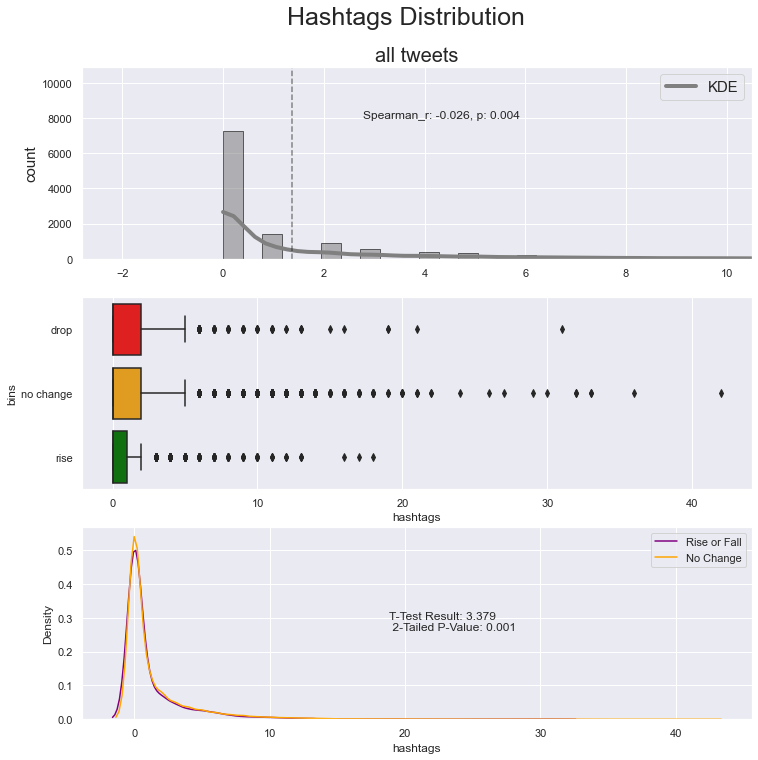

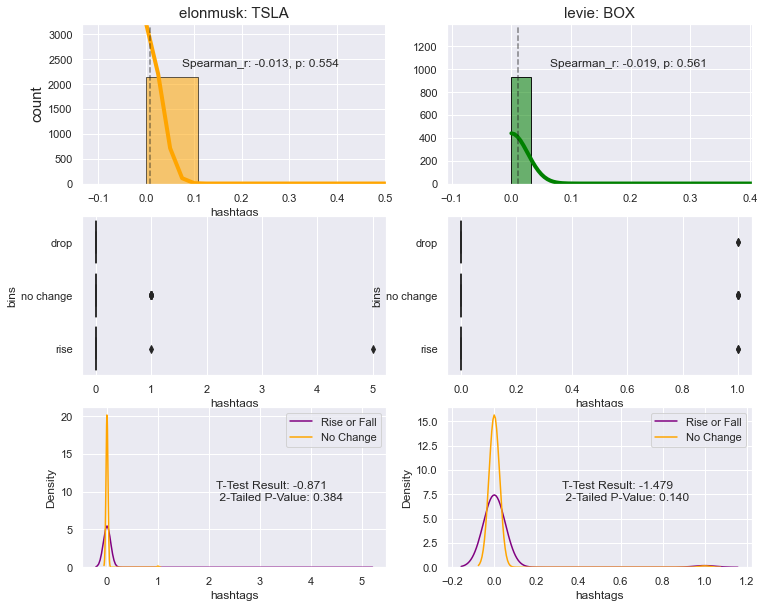

hashtags 
 
 
 
 
 mean 
 0.008809 
 
 
 std 
 0.134207 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 5.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 2142 
 0.993 
 
 
 btwn_0_1_std 
 2142 
 0.993 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 15 
 0.007 
 
 
 
 
 
 
 hashtags 
 
 
 
 
 mean 
 0.011665 
 
 
 std 
 0.107429 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 1.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 932 
 0.988 
 
 
 btwn_0_1_std 
 932 
 0.988 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 11 
 0.012

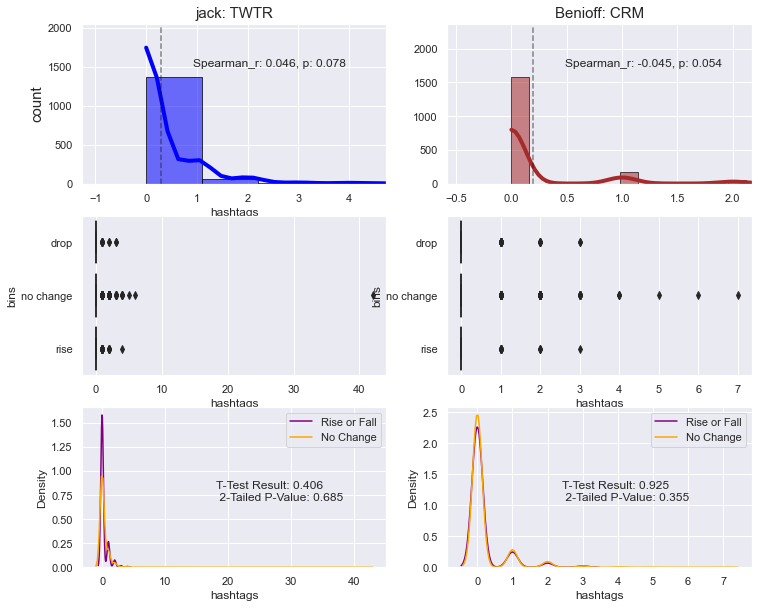

hashtags 
 
 
 
 
 mean 
 0.287101 
 
 
 std 
 1.263687 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 42.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 1168 
 0.81 
 
 
 btwn_0_1_std 
 1370 
 0.95 
 
 
 btwn_1_2_std 
 54 
 0.037 
 
 
 over_2_std 
 18 
 0.012 
 
 
 
 
 
 
 hashtags 
 
 
 
 
 mean 
 0.197168 
 
 
 std 
 0.578745 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 7.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 1582 
 0.862 
 
 
 btwn_0_1_std 
 1582 
 0.862 
 
 
 btwn_1_2_std 
 178 
 0.097 
 
 
 over_2_std 
 76 
 0.041

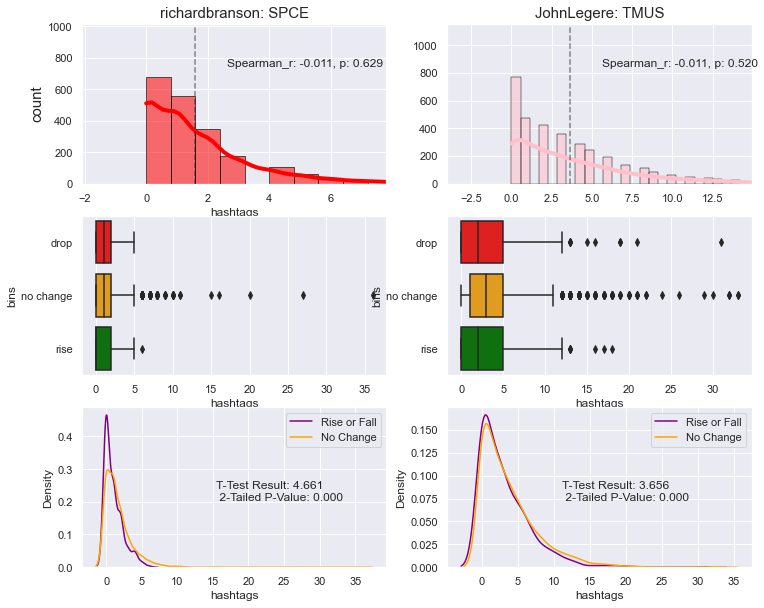

hashtags 
 
 
 
 
 mean 
 1.582379 
 
 
 std 
 2.083493 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 1.000000 
 
 
 75% 
 2.000000 
 
 
 max 
 36.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 678 
 0.337 
 
 
 btwn_0_1_std 
 1583 
 0.788 
 
 
 btwn_1_2_std 
 281 
 0.14 
 
 
 over_2_std 
 145 
 0.072 
 
 
 
 
 
 
 hashtags 
 
 
 
 
 mean 
 3.626977 
 
 
 std 
 3.981889 
 
 
 min 
 0.000000 
 
 
 25% 
 1.000000 
 
 
 50% 
 3.000000 
 
 
 75% 
 5.000000 
 
 
 max 
 33.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 771 
 0.23 
 
 
 btwn_0_1_std 
 2026 
 0.605 
 
 
 btwn_1_2_std 
 856 
 0.255 
 
 
 over_2_std 
 469 
 0.14

In [23]:
df = tweet_stocks.copy()
feature = features[1]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(311)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=False, spearmanr=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)


plt.subplot(312)

sns.boxplot(data=df, x = feature, y = 'bins', palette=['red', 'orange', 'green'])

plt.subplot(313)
result, p_val = ttest_ind(df[feature][df['bins'] == 'no change'], df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], equal_var = True)
sns.kdeplot(df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], color='purple' ,alpha=0.3)
sns.kdeplot(df[feature][df['bins'] == 'no change'], color='orange', alpha=0.3)
plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.45, .15), xycoords='figure fraction')
plt.legend(['Rise or Fall', 'No Change'])

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(321)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=False, spearmanr=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(322)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=False, spearmanr=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')
    
    plt.subplot(323)
    sns.boxplot(data=df[df['username']==mapper[i][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    plt.subplot(324)
    sns.boxplot(data=df[df['username']==mapper[j][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    
    plt.subplot(325)
    
    df_usn = df[df['username']==mapper[i][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.25, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])
    
    plt.subplot(326)
    
    df_usn = df[df['username']==mapper[j][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.65, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])


    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2


cashtags 
 
 
 
 
 mean 
 0.020361 
 
 
 std 
 0.359647 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 16.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 11655 
 0.993 
 
 
 btwn_0_1_std 
 11655 
 0.993 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 83 
 0.007

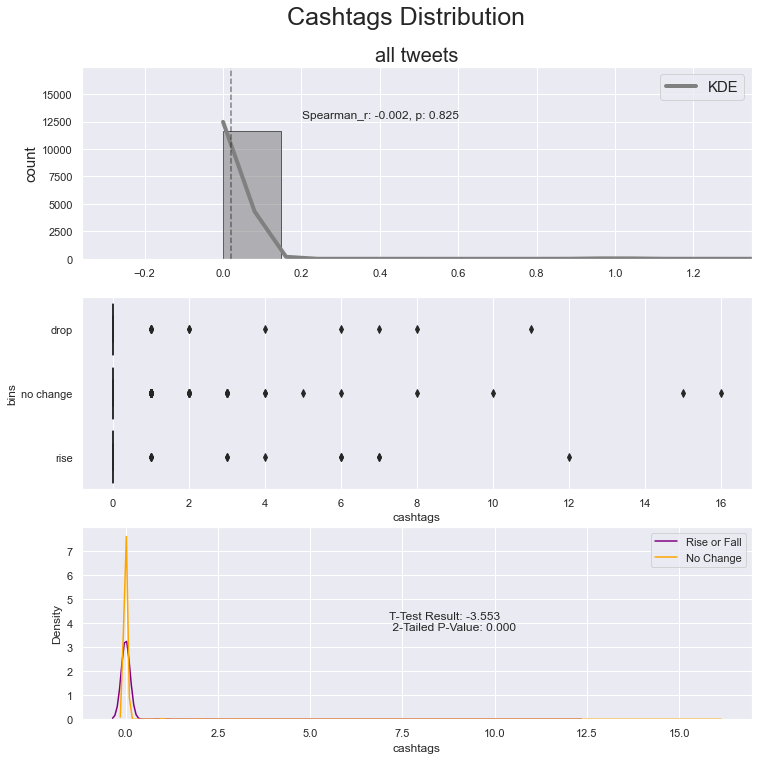

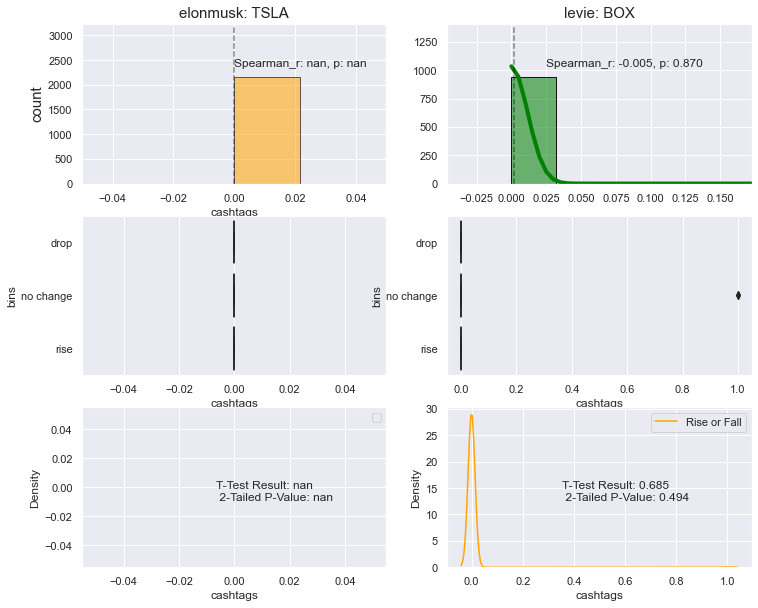

cashtags 
 
 
 
 
 mean 
 0.0 
 
 
 std 
 0.0 
 
 
 min 
 0.0 
 
 
 25% 
 0.0 
 
 
 50% 
 0.0 
 
 
 75% 
 0.0 
 
 
 max 
 0.0 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 2157 
 1.0 
 
 
 btwn_0_1_std 
 2157 
 1.0 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 0 
 0.0 
 
 
 
 
 
 
 cashtags 
 
 
 
 
 mean 
 0.002121 
 
 
 std 
 0.046029 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 1.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 941 
 0.998 
 
 
 btwn_0_1_std 
 941 
 0.998 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 2 
 0.002

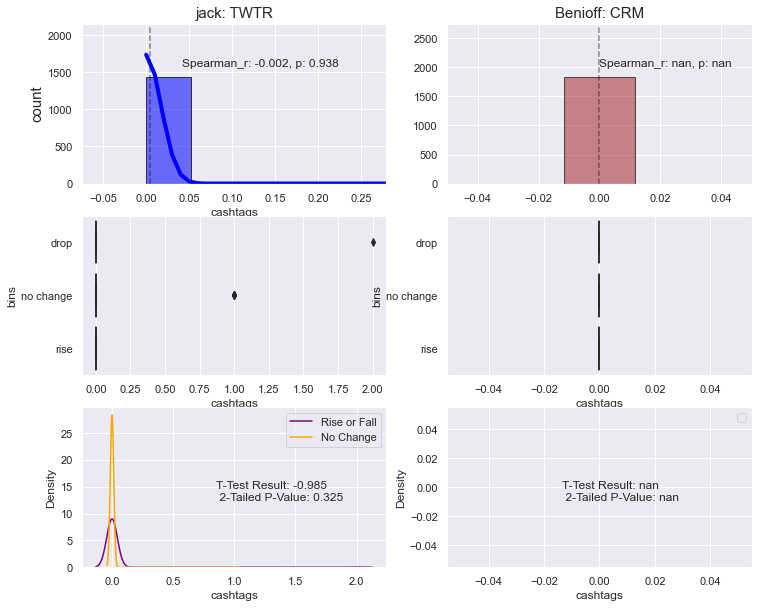

cashtags 
 
 
 
 
 mean 
 0.004161 
 
 
 std 
 0.074393 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 2.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 1437 
 0.997 
 
 
 btwn_0_1_std 
 1437 
 0.997 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 5 
 0.003 
 
 
 
 
 
 
 cashtags 
 
 
 
 
 mean 
 0.0 
 
 
 std 
 0.0 
 
 
 min 
 0.0 
 
 
 25% 
 0.0 
 
 
 50% 
 0.0 
 
 
 75% 
 0.0 
 
 
 max 
 0.0 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 1836 
 1.0 
 
 
 btwn_0_1_std 
 1836 
 1.0 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 0 
 0.0

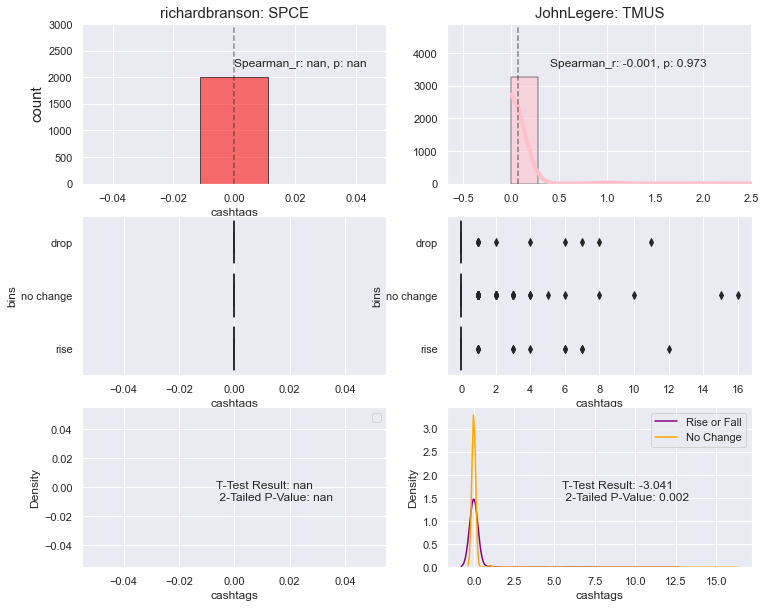

cashtags 
 
 
 
 
 mean 
 0.0 
 
 
 std 
 0.0 
 
 
 min 
 0.0 
 
 
 25% 
 0.0 
 
 
 50% 
 0.0 
 
 
 75% 
 0.0 
 
 
 max 
 0.0 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 2009 
 1.0 
 
 
 btwn_0_1_std 
 2009 
 1.0 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 0 
 0.0 
 
 
 
 
 
 
 cashtags 
 
 
 
 
 mean 
 0.068935 
 
 
 std 
 0.668497 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 16.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 3275 
 0.977 
 
 
 btwn_0_1_std 
 3275 
 0.977 
 
 
 btwn_1_2_std 
 38 
 0.011 
 
 
 over_2_std 
 38 
 0.011

In [24]:
df = tweet_stocks.copy()
feature = features[2]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(311)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=False, spearmanr=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)


plt.subplot(312)

sns.boxplot(data=df, x = feature, y = 'bins', palette=['red', 'orange', 'green'])

plt.subplot(313)
result, p_val = ttest_ind(df[feature][df['bins'] == 'no change'], df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], equal_var = True)
sns.kdeplot(df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], color='purple' ,alpha=0.3)
sns.kdeplot(df[feature][df['bins'] == 'no change'], color='orange', alpha=0.3)
plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.45, .15), xycoords='figure fraction')
plt.legend(['Rise or Fall', 'No Change'])

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(321)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=False, spearmanr=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(322)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=False, spearmanr=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')
    
    plt.subplot(323)
    sns.boxplot(data=df[df['username']==mapper[i][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    plt.subplot(324)
    sns.boxplot(data=df[df['username']==mapper[j][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    
    plt.subplot(325)
    
    df_usn = df[df['username']==mapper[i][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.25, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])
    
    plt.subplot(326)
    
    df_usn = df[df['username']==mapper[j][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.65, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])


    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2




video 
 
 
 
 
 mean 
 1.622678 
 
 
 std 
 2.280602 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 1.000000 
 
 
 75% 
 2.000000 
 
 
 max 
 36.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 5100 
 0.434 
 
 
 btwn_0_1_std 
 8883 
 0.757 
 
 
 btwn_1_2_std 
 1663 
 0.142 
 
 
 over_2_std 
 1192 
 0.102

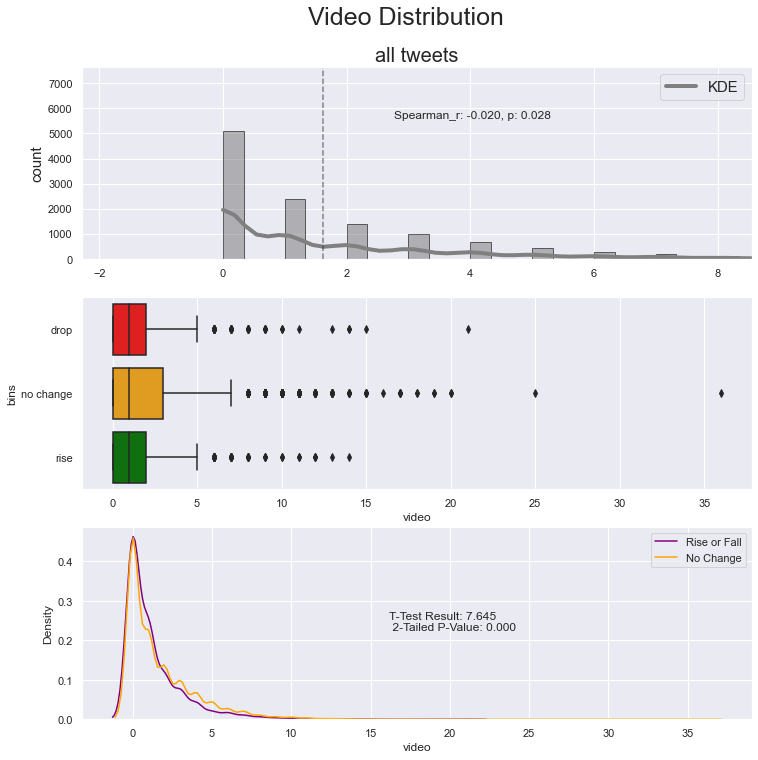

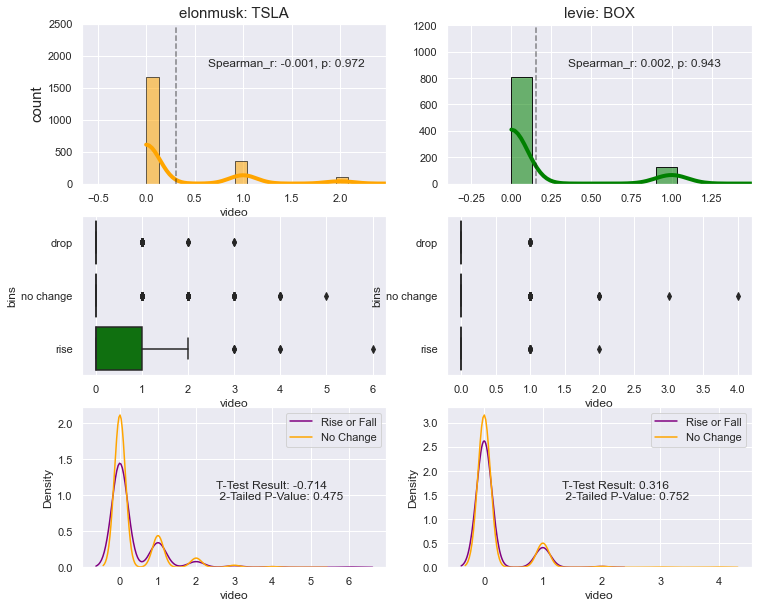

video 
 
 
 
 
 mean 
 0.309226 
 
 
 std 
 0.661261 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 6.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 1668 
 0.773 
 
 
 btwn_0_1_std 
 1668 
 0.773 
 
 
 btwn_1_2_std 
 357 
 0.166 
 
 
 over_2_std 
 132 
 0.061 
 
 
 
 
 
 
 video 
 
 
 
 
 mean 
 0.153765 
 
 
 std 
 0.399979 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 4.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 808 
 0.857 
 
 
 btwn_0_1_std 
 808 
 0.857 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 135 
 0.143

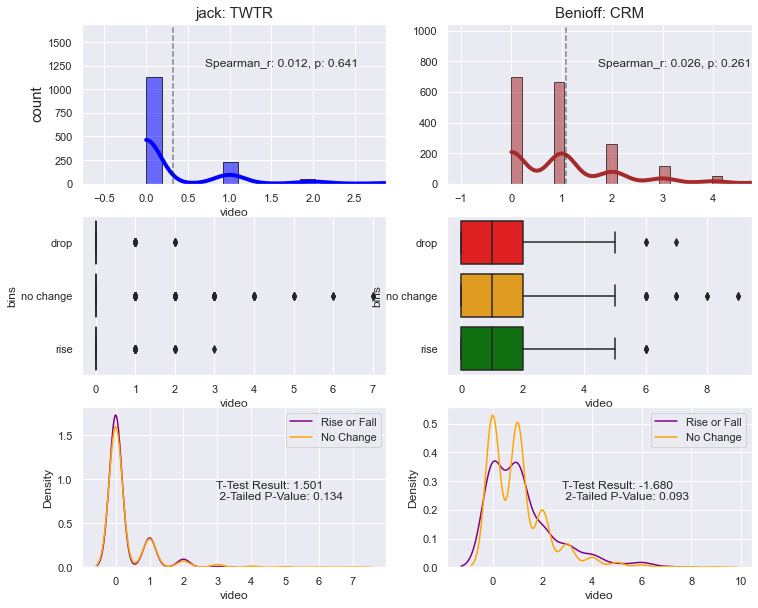

video 
 
 
 
 
 mean 
 0.321082 
 
 
 std 
 0.768182 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 7.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 1130 
 0.784 
 
 
 btwn_0_1_std 
 1130 
 0.784 
 
 
 btwn_1_2_std 
 226 
 0.157 
 
 
 over_2_std 
 86 
 0.06 
 
 
 
 
 
 
 video 
 
 
 
 
 mean 
 1.088780 
 
 
 std 
 1.271042 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 1.000000 
 
 
 75% 
 2.000000 
 
 
 max 
 9.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 698 
 0.38 
 
 
 btwn_0_1_std 
 1365 
 0.743 
 
 
 btwn_1_2_std 
 260 
 0.142 
 
 
 over_2_std 
 211 
 0.115

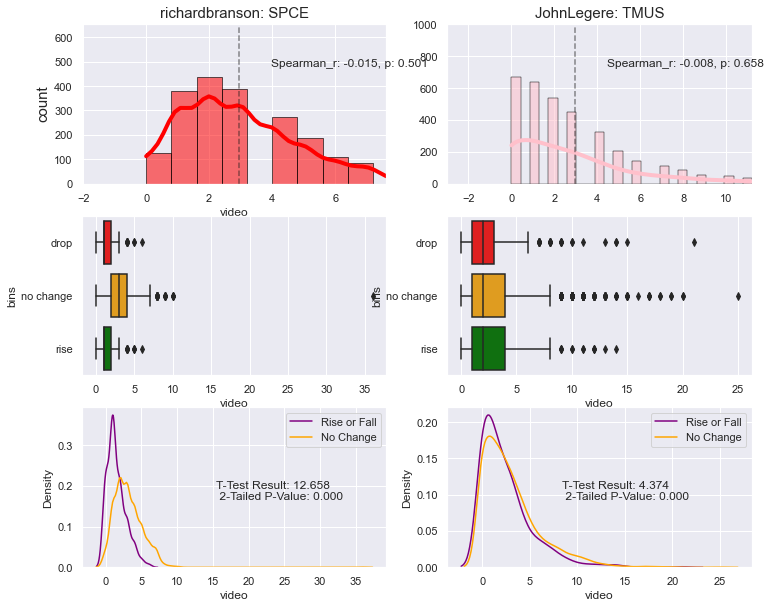

video 
 
 
 
 
 mean 
 2.953211 
 
 
 std 
 2.033779 
 
 
 min 
 0.000000 
 
 
 25% 
 1.000000 
 
 
 50% 
 3.000000 
 
 
 75% 
 4.000000 
 
 
 max 
 36.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 126 
 0.063 
 
 
 btwn_0_1_std 
 943 
 0.469 
 
 
 btwn_1_2_std 
 661 
 0.329 
 
 
 over_2_std 
 405 
 0.202 
 
 
 
 
 
 
 video 
 
 
 
 
 mean 
 2.936437 
 
 
 std 
 2.981008 
 
 
 min 
 0.000000 
 
 
 25% 
 1.000000 
 
 
 50% 
 2.000000 
 
 
 75% 
 4.000000 
 
 
 max 
 25.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 670 
 0.2 
 
 
 btwn_0_1_std 
 1843 
 0.55 
 
 
 btwn_1_2_std 
 980 
 0.292 
 
 
 over_2_std 
 528 
 0.158

In [25]:
df = tweet_stocks.copy()
feature = features[3]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(311)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=False, spearmanr=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)


plt.subplot(312)

sns.boxplot(data=df, x = feature, y = 'bins', palette=['red', 'orange', 'green'])

plt.subplot(313)
result, p_val = ttest_ind(df[feature][df['bins'] == 'no change'], df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], equal_var = True)
sns.kdeplot(df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], color='purple' ,alpha=0.3)
sns.kdeplot(df[feature][df['bins'] == 'no change'], color='orange', alpha=0.3)
plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.45, .15), xycoords='figure fraction')
plt.legend(['Rise or Fall', 'No Change'])

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(321)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=False, spearmanr=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(322)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=False, spearmanr=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')
    
    plt.subplot(323)
    sns.boxplot(data=df[df['username']==mapper[i][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    plt.subplot(324)
    sns.boxplot(data=df[df['username']==mapper[j][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    
    plt.subplot(325)
    
    df_usn = df[df['username']==mapper[i][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.25, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])
    
    plt.subplot(326)
    
    df_usn = df[df['username']==mapper[j][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.65, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])


    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2



photos 
 
 
 
 
 mean 
 1.663145 
 
 
 std 
 2.436413 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 1.000000 
 
 
 75% 
 3.000000 
 
 
 max 
 25.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 5477 
 0.467 
 
 
 btwn_0_1_std 
 8781 
 0.748 
 
 
 btwn_1_2_std 
 1612 
 0.137 
 
 
 over_2_std 
 1345 
 0.115

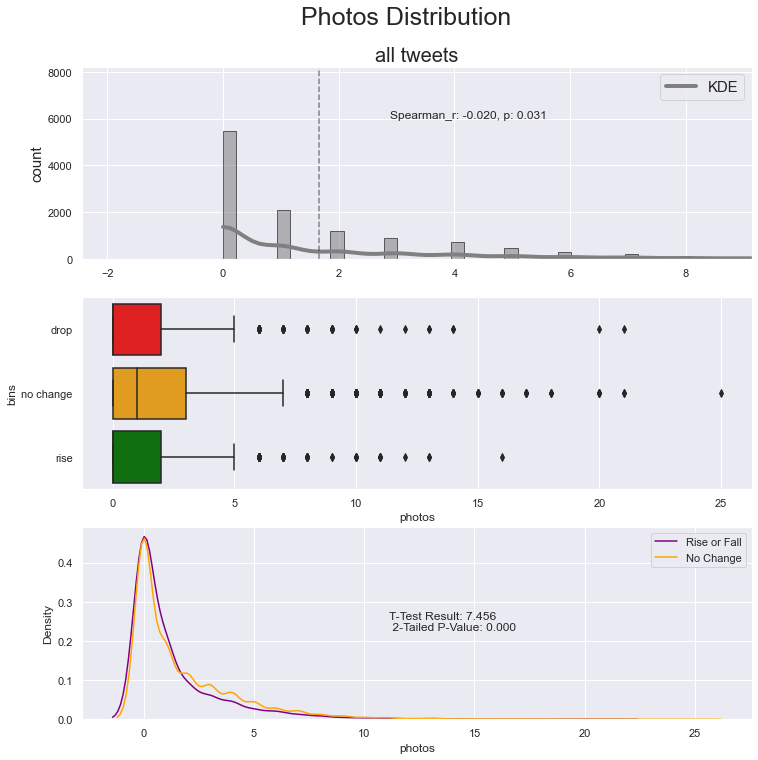

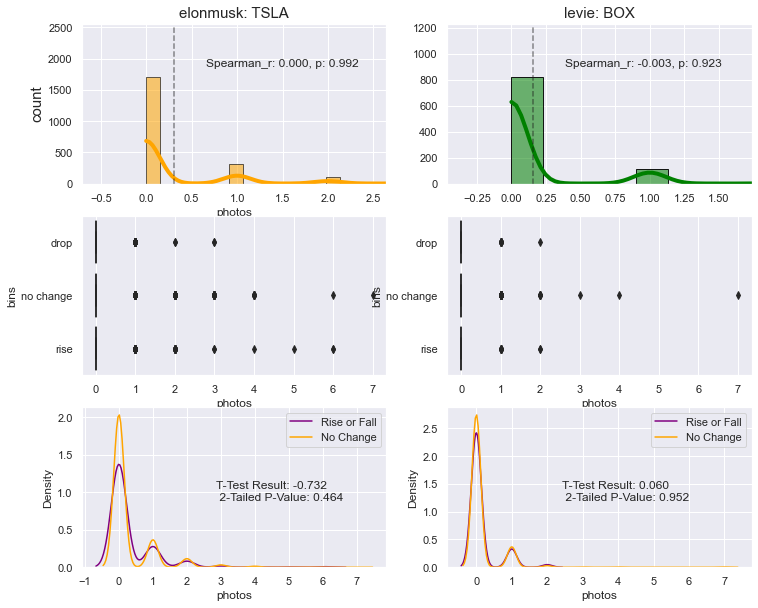

photos 
 
 
 
 
 mean 
 0.302735 
 
 
 std 
 0.704911 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 7.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 1706 
 0.791 
 
 
 btwn_0_1_std 
 1706 
 0.791 
 
 
 btwn_1_2_std 
 314 
 0.146 
 
 
 over_2_std 
 137 
 0.064 
 
 
 
 
 
 
 photos 
 
 
 
 
 mean 
 0.152704 
 
 
 std 
 0.463086 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 7.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 820 
 0.87 
 
 
 btwn_0_1_std 
 820 
 0.87 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 123 
 0.13

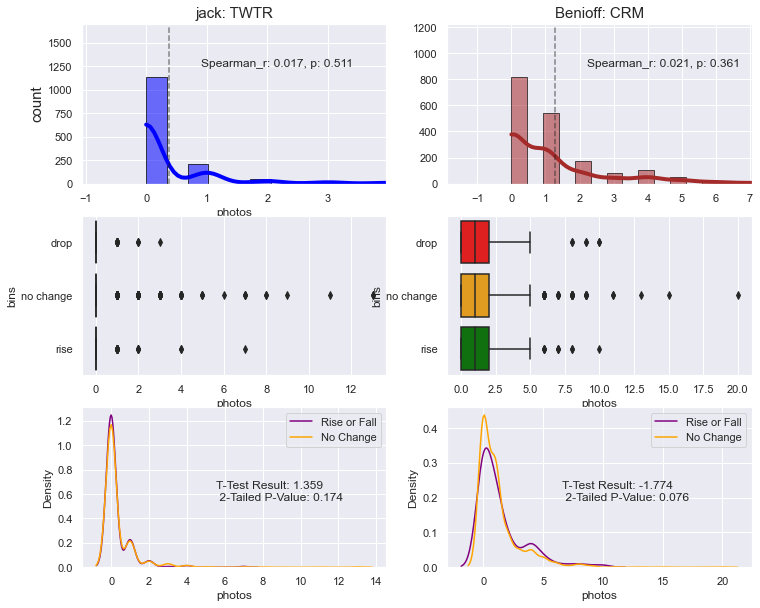

photos 
 
 
 
 
 mean 
 0.376560 
 
 
 std 
 1.057188 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 13.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 1134 
 0.786 
 
 
 btwn_0_1_std 
 1342 
 0.931 
 
 
 btwn_1_2_std 
 48 
 0.033 
 
 
 over_2_std 
 52 
 0.036 
 
 
 
 
 
 
 photos 
 
 
 
 
 mean 
 1.273965 
 
 
 std 
 1.879938 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 1.000000 
 
 
 75% 
 2.000000 
 
 
 max 
 20.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 819 
 0.446 
 
 
 btwn_0_1_std 
 1358 
 0.74 
 
 
 btwn_1_2_std 
 254 
 0.138 
 
 
 over_2_std 
 224 
 0.122

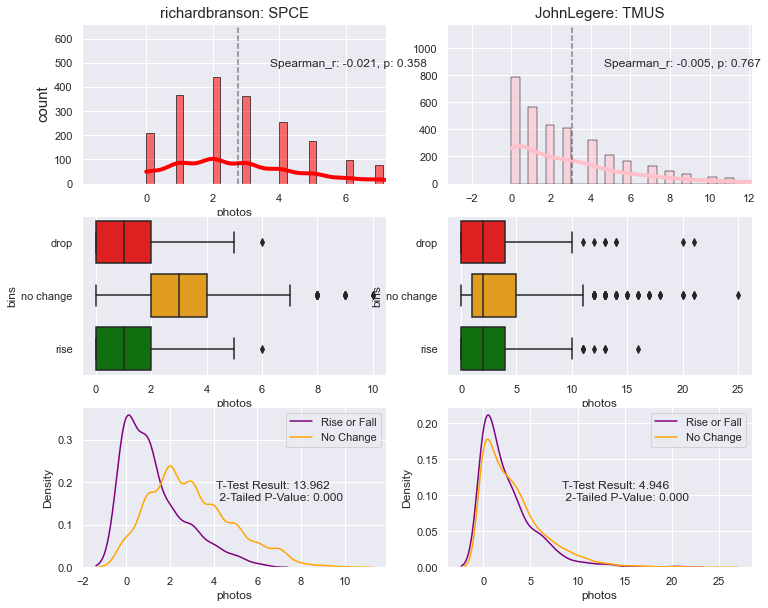

photos 
 
 
 
 
 mean 
 2.762071 
 
 
 std 
 1.926212 
 
 
 min 
 0.000000 
 
 
 25% 
 1.000000 
 
 
 50% 
 2.000000 
 
 
 75% 
 4.000000 
 
 
 max 
 10.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 211 
 0.105 
 
 
 btwn_0_1_std 
 578 
 0.288 
 
 
 btwn_1_2_std 
 803 
 0.4 
 
 
 over_2_std 
 628 
 0.313 
 
 
 
 
 
 
 photos 
 
 
 
 
 mean 
 3.071919 
 
 
 std 
 3.230806 
 
 
 min 
 0.000000 
 
 
 25% 
 1.000000 
 
 
 50% 
 2.000000 
 
 
 75% 
 4.000000 
 
 
 max 
 25.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 787 
 0.235 
 
 
 btwn_0_1_std 
 2197 
 0.656 
 
 
 btwn_1_2_std 
 701 
 0.209 
 
 
 over_2_std 
 453 
 0.135

In [26]:
df = tweet_stocks.copy()
feature = features[4]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(311)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=False, spearmanr=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)


plt.subplot(312)

sns.boxplot(data=df, x = feature, y = 'bins', palette=['red', 'orange', 'green'])

plt.subplot(313)
result, p_val = ttest_ind(df[feature][df['bins'] == 'no change'], df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], equal_var = True)
sns.kdeplot(df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], color='purple' ,alpha=0.3)
sns.kdeplot(df[feature][df['bins'] == 'no change'], color='orange', alpha=0.3)
plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.45, .15), xycoords='figure fraction')
plt.legend(['Rise or Fall', 'No Change'])

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(321)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=False, spearmanr=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(322)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=False, spearmanr=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')
    
    plt.subplot(323)
    sns.boxplot(data=df[df['username']==mapper[i][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    plt.subplot(324)
    sns.boxplot(data=df[df['username']==mapper[j][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    
    plt.subplot(325)
    
    df_usn = df[df['username']==mapper[i][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.25, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])
    
    plt.subplot(326)
    
    df_usn = df[df['username']==mapper[j][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.65, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])


    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2



urls 
 
 
 
 
 mean 
 1.566195 
 
 
 std 
 1.947314 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 1.000000 
 
 
 75% 
 2.000000 
 
 
 max 
 32.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 4334 
 0.369 
 
 
 btwn_0_1_std 
 7285 
 0.621 
 
 
 btwn_1_2_std 
 2842 
 0.242 
 
 
 over_2_std 
 1611 
 0.137

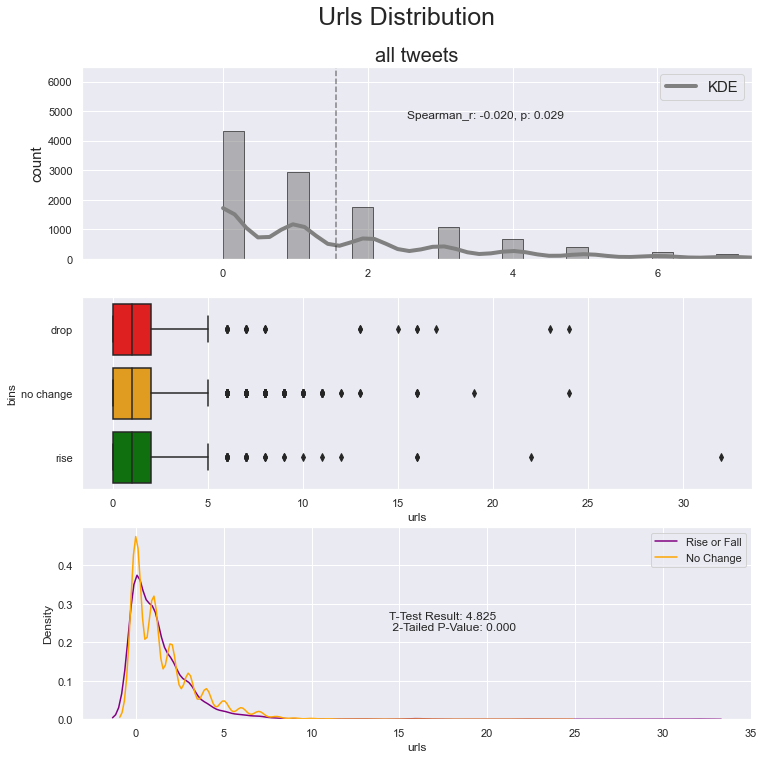

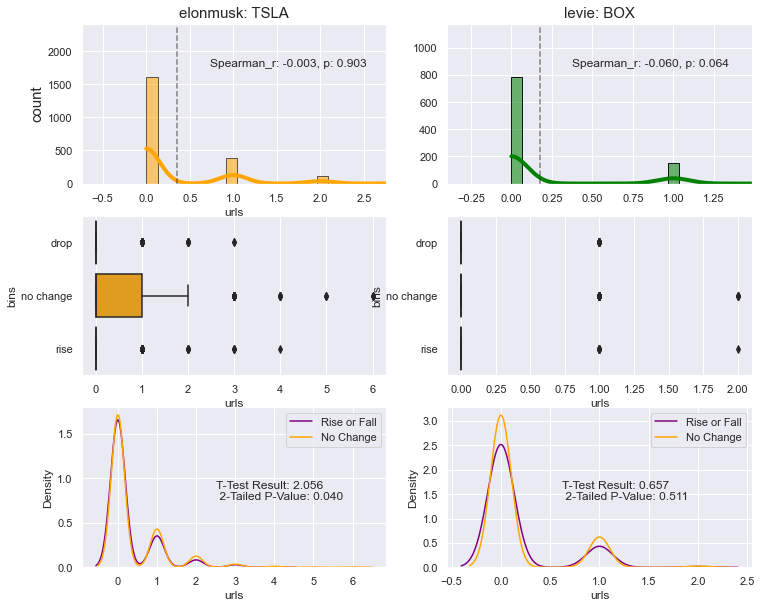

urls 
 
 
 
 
 mean 
 0.359759 
 
 
 std 
 0.735663 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 1.000000 
 
 
 max 
 6.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 1609 
 0.746 
 
 
 btwn_0_1_std 
 1609 
 0.746 
 
 
 btwn_1_2_std 
 391 
 0.181 
 
 
 over_2_std 
 157 
 0.073 
 
 
 
 
 
 
 urls 
 
 
 
 
 mean 
 0.173913 
 
 
 std 
 0.395675 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 2.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 785 
 0.832 
 
 
 btwn_0_1_std 
 785 
 0.832 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 158 
 0.168

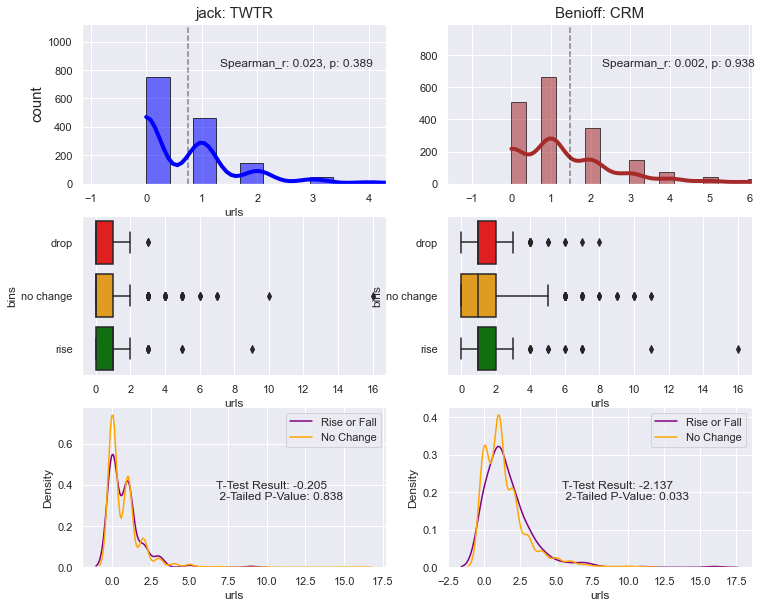

urls 
 
 
 
 
 mean 
 0.759362 
 
 
 std 
 1.152344 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 1.000000 
 
 
 max 
 16.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 751 
 0.521 
 
 
 btwn_0_1_std 
 1214 
 0.842 
 
 
 btwn_1_2_std 
 142 
 0.098 
 
 
 over_2_std 
 86 
 0.06 
 
 
 
 
 
 
 urls 
 
 
 
 
 mean 
 1.468410 
 
 
 std 
 1.615519 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 1.000000 
 
 
 75% 
 2.000000 
 
 
 max 
 16.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 511 
 0.278 
 
 
 btwn_0_1_std 
 1176 
 0.641 
 
 
 btwn_1_2_std 
 492 
 0.268 
 
 
 over_2_std 
 168 
 0.092

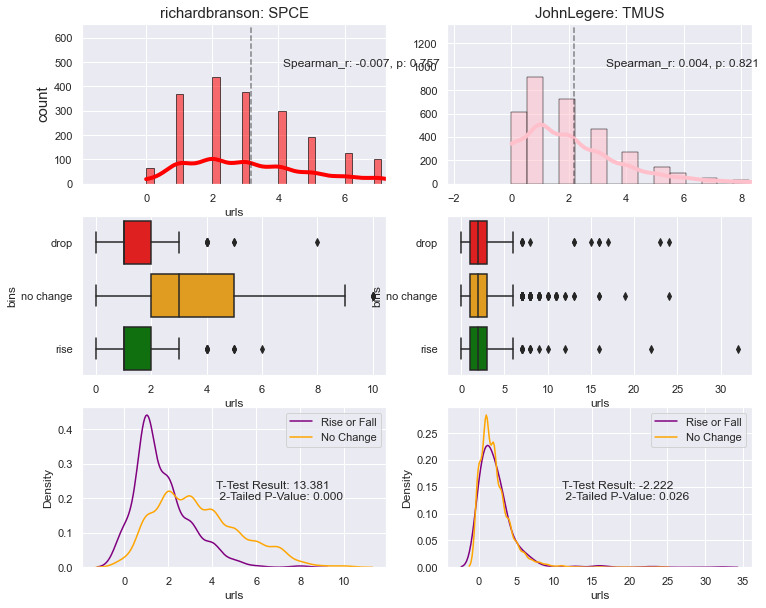

urls 
 
 
 
 
 mean 
 3.161772 
 
 
 std 
 1.937318 
 
 
 min 
 0.000000 
 
 
 25% 
 2.000000 
 
 
 50% 
 3.000000 
 
 
 75% 
 4.000000 
 
 
 max 
 10.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 65 
 0.032 
 
 
 btwn_0_1_std 
 432 
 0.215 
 
 
 btwn_1_2_std 
 818 
 0.407 
 
 
 over_2_std 
 759 
 0.378 
 
 
 
 
 
 
 urls 
 
 
 
 
 mean 
 2.178753 
 
 
 std 
 2.229914 
 
 
 min 
 0.000000 
 
 
 25% 
 1.000000 
 
 
 50% 
 2.000000 
 
 
 75% 
 3.000000 
 
 
 max 
 32.000000 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 613 
 0.183 
 
 
 btwn_0_1_std 
 2252 
 0.672 
 
 
 btwn_1_2_std 
 740 
 0.221 
 
 
 over_2_std 
 359 
 0.107

In [27]:
df = tweet_stocks.copy()
feature = features[5]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(311)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=False, spearmanr=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)


plt.subplot(312)

sns.boxplot(data=df, x = feature, y = 'bins', palette=['red', 'orange', 'green'])

plt.subplot(313)
result, p_val = ttest_ind(df[feature][df['bins'] == 'no change'], df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], equal_var = True)
sns.kdeplot(df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], color='purple' ,alpha=0.3)
sns.kdeplot(df[feature][df['bins'] == 'no change'], color='orange', alpha=0.3)
plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.45, .15), xycoords='figure fraction')
plt.legend(['Rise or Fall', 'No Change'])

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(321)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=False, spearmanr=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(322)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=False, spearmanr=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')
    
    plt.subplot(323)
    sns.boxplot(data=df[df['username']==mapper[i][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    plt.subplot(324)
    sns.boxplot(data=df[df['username']==mapper[j][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    
    plt.subplot(325)
    
    df_usn = df[df['username']==mapper[i][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.25, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])
    
    plt.subplot(326)
    
    df_usn = df[df['username']==mapper[j][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.65, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])


    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2



replies_count 
 
 
 
 
 mean 
 4.543305 
 
 
 std 
 1.948625 
 
 
 min 
 0.000000 
 
 
 25% 
 3.332205 
 
 
 50% 
 4.369448 
 
 
 75% 
 5.468060 
 
 
 max 
 12.227908 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 100 
 0.009 
 
 
 btwn_0_1_std 
 965 
 0.082 
 
 
 btwn_1_2_std 
 3453 
 0.294 
 
 
 over_2_std 
 7320 
 0.624

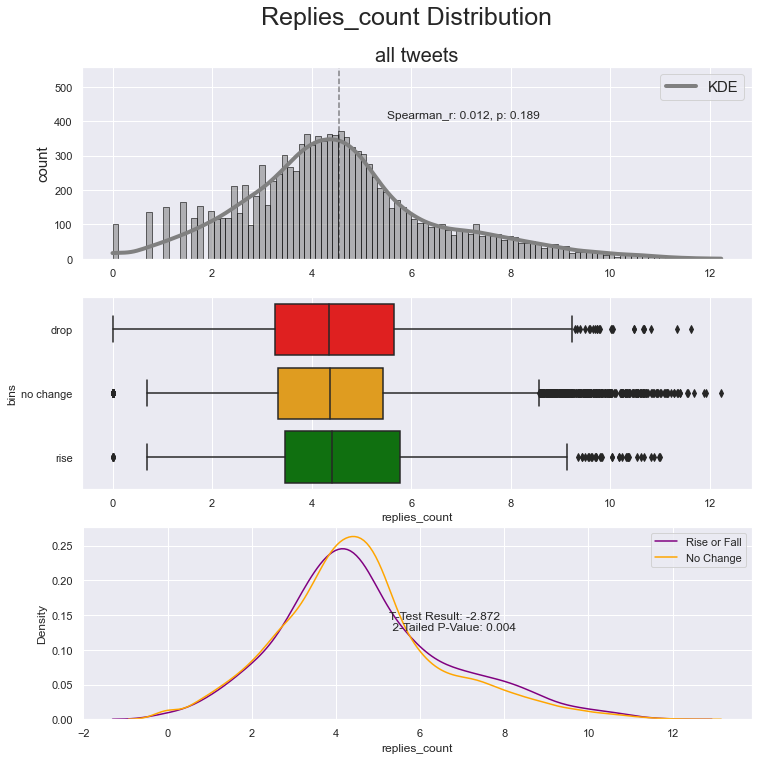

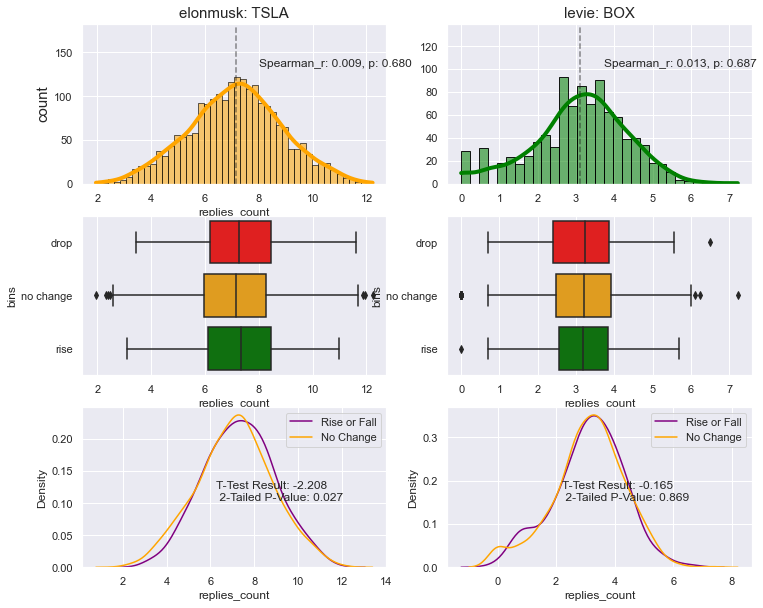

replies_count 
 
 
 
 
 mean 
 7.151971 
 
 
 std 
 1.720410 
 
 
 min 
 1.945910 
 
 
 25% 
 6.011267 
 
 
 50% 
 7.180070 
 
 
 75% 
 8.298042 
 
 
 max 
 12.227908 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 35 
 0.016 
 
 
 over_2_std 
 2122 
 0.984 
 
 
 
 
 
 
 replies_count 
 
 
 
 
 mean 
 3.108127 
 
 
 std 
 1.222864 
 
 
 min 
 0.000000 
 
 
 25% 
 2.484907 
 
 
 50% 
 3.178054 
 
 
 75% 
 3.881511 
 
 
 max 
 7.225481 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 28 
 0.03 
 
 
 btwn_0_1_std 
 77 
 0.082 
 
 
 btwn_1_2_std 
 157 
 0.166 
 
 
 over_2_std 
 709 
 0.752

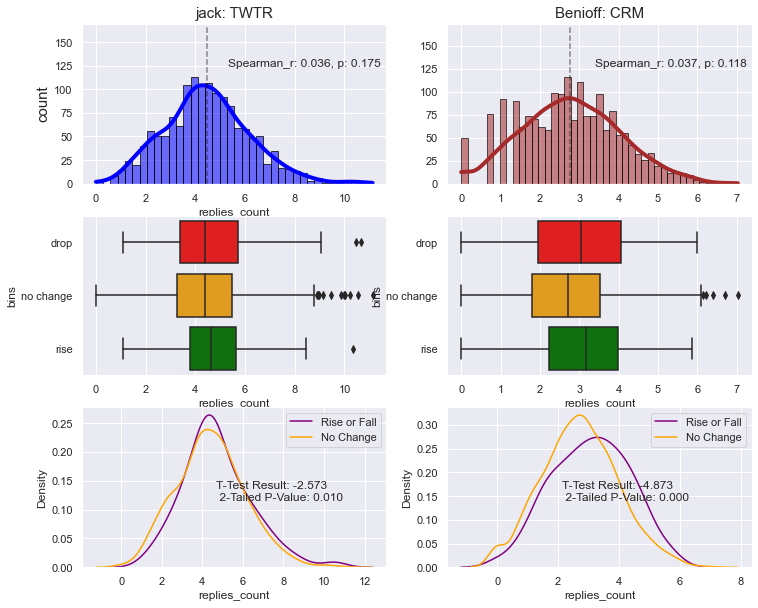

replies_count 
 
 
 
 
 mean 
 4.468252 
 
 
 std 
 1.716818 
 
 
 min 
 0.000000 
 
 
 25% 
 3.332205 
 
 
 50% 
 4.406719 
 
 
 75% 
 5.500236 
 
 
 max 
 11.132777 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 4 
 0.003 
 
 
 btwn_0_1_std 
 70 
 0.049 
 
 
 btwn_1_2_std 
 308 
 0.214 
 
 
 over_2_std 
 1064 
 0.738 
 
 
 
 
 
 
 replies_count 
 
 
 
 
 mean 
 2.775630 
 
 
 std 
 1.261825 
 
 
 min 
 0.000000 
 
 
 25% 
 1.945910 
 
 
 50% 
 2.772589 
 
 
 75% 
 3.610918 
 
 
 max 
 7.026427 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 50 
 0.027 
 
 
 btwn_0_1_std 
 218 
 0.119 
 
 
 btwn_1_2_std 
 557 
 0.303 
 
 
 over_2_std 
 1061 
 0.578

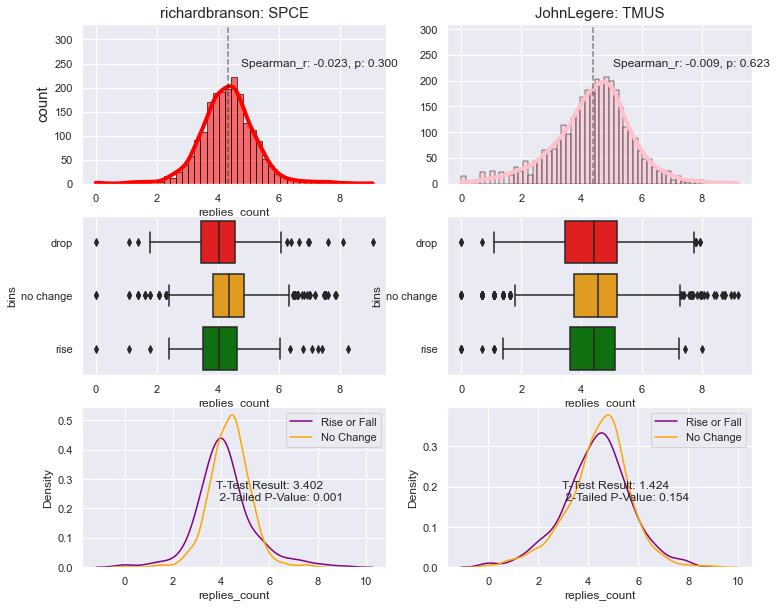

replies_count 
 
 
 
 
 mean 
 4.326400 
 
 
 std 
 0.900796 
 
 
 min 
 0.000000 
 
 
 25% 
 3.806662 
 
 
 50% 
 4.317488 
 
 
 75% 
 4.836282 
 
 
 max 
 9.084550 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 4 
 0.002 
 
 
 btwn_0_1_std 
 4 
 0.002 
 
 
 btwn_1_2_std 
 16 
 0.008 
 
 
 over_2_std 
 1989 
 0.99 
 
 
 
 
 
 
 replies_count 
 
 
 
 
 mean 
 4.398846 
 
 
 std 
 1.275272 
 
 
 min 
 0.000000 
 
 
 25% 
 3.713572 
 
 
 50% 
 4.510860 
 
 
 75% 
 5.164786 
 
 
 max 
 9.201804 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 14 
 0.004 
 
 
 btwn_0_1_std 
 60 
 0.018 
 
 
 btwn_1_2_std 
 199 
 0.059 
 
 
 over_2_std 
 3092 
 0.923

In [28]:
df = tweet_stocks.copy()
feature = features[6]
df[feature] += 1
df[feature] = np.log(df[feature])
display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(311)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=False, spearmanr=True, truncate=False)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)


plt.subplot(312)

sns.boxplot(data=df, x = feature, y = 'bins', palette=['red', 'orange', 'green'])

plt.subplot(313)
result, p_val = ttest_ind(df[feature][df['bins'] == 'no change'], df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], equal_var = True)
sns.kdeplot(df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], color='purple' ,alpha=0.3)
sns.kdeplot(df[feature][df['bins'] == 'no change'], color='orange', alpha=0.3)
plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.45, .15), xycoords='figure fraction')
plt.legend(['Rise or Fall', 'No Change'])

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(321)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=False, spearmanr=True, truncate=False)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(322)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=False, spearmanr=True, truncate=False)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')
    
    plt.subplot(323)
    sns.boxplot(data=df[df['username']==mapper[i][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    plt.subplot(324)
    sns.boxplot(data=df[df['username']==mapper[j][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    
    plt.subplot(325)
    
    df_usn = df[df['username']==mapper[i][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.25, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])
    
    plt.subplot(326)
    
    df_usn = df[df['username']==mapper[j][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.65, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])


    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2


retweets_count 
 
 
 
 
 mean 
 5.182438 
 
 
 std 
 2.077937 
 
 
 min 
 0.000000 
 
 
 25% 
 3.988984 
 
 
 50% 
 5.010635 
 
 
 75% 
 6.086775 
 
 
 max 
 13.275030 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 137 
 0.012 
 
 
 btwn_0_1_std 
 619 
 0.053 
 
 
 btwn_1_2_std 
 2708 
 0.231 
 
 
 over_2_std 
 8411 
 0.717

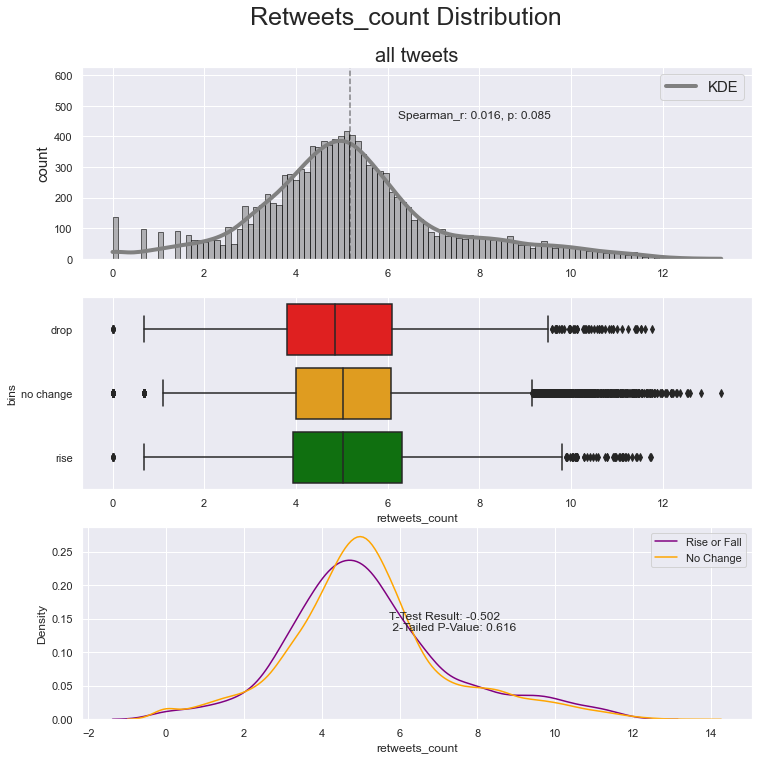

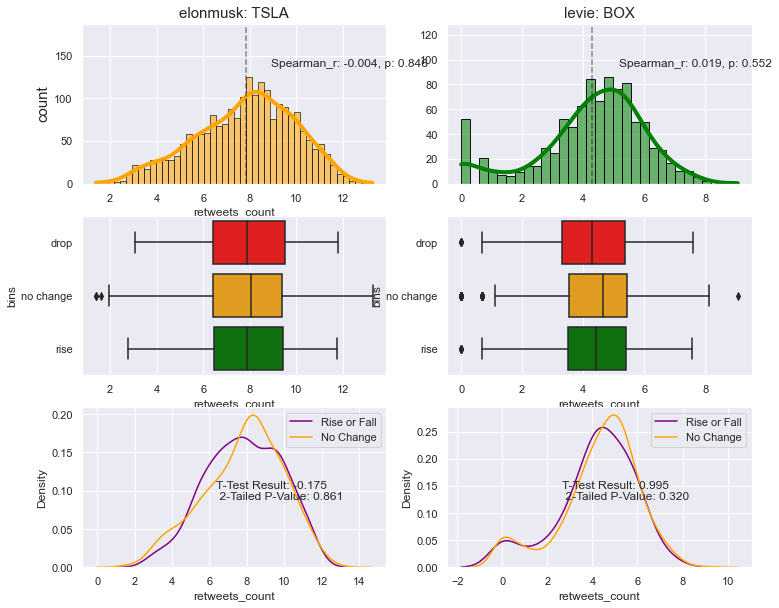

retweets_count 
 
 
 
 
 mean 
 7.830236 
 
 
 std 
 2.117422 
 
 
 min 
 1.386294 
 
 
 25% 
 6.406880 
 
 
 50% 
 8.021256 
 
 
 75% 
 9.397235 
 
 
 max 
 13.275030 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 6 
 0.003 
 
 
 btwn_1_2_std 
 134 
 0.062 
 
 
 over_2_std 
 2017 
 0.935 
 
 
 
 
 
 
 retweets_count 
 
 
 
 
 mean 
 4.296493 
 
 
 std 
 1.742296 
 
 
 min 
 0.000000 
 
 
 25% 
 3.496508 
 
 
 50% 
 4.564348 
 
 
 75% 
 5.429346 
 
 
 max 
 9.067393 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 52 
 0.055 
 
 
 btwn_0_1_std 
 96 
 0.102 
 
 
 btwn_1_2_std 
 139 
 0.147 
 
 
 over_2_std 
 708 
 0.751

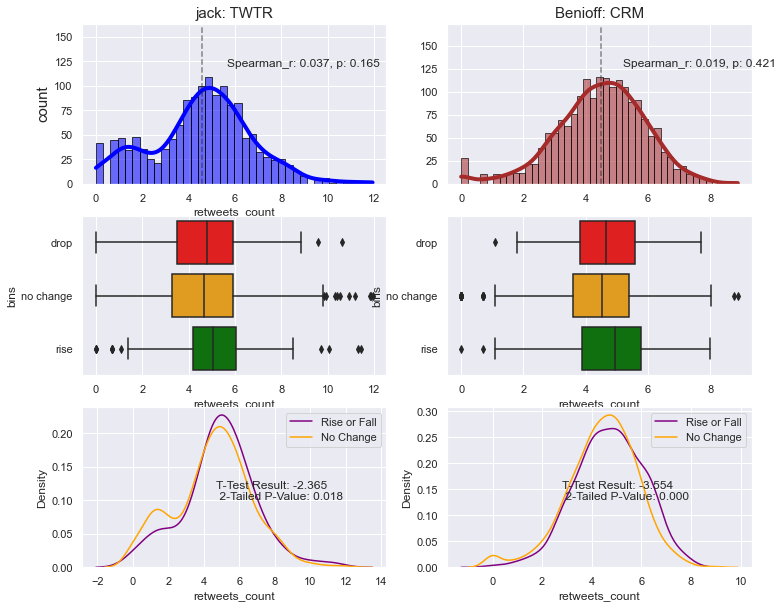

retweets_count 
 
 
 
 
 mean 
 4.563644 
 
 
 std 
 2.160500 
 
 
 min 
 0.000000 
 
 
 25% 
 3.332205 
 
 
 50% 
 4.736198 
 
 
 75% 
 5.907403 
 
 
 max 
 11.928922 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 42 
 0.029 
 
 
 btwn_0_1_std 
 238 
 0.165 
 
 
 btwn_1_2_std 
 350 
 0.243 
 
 
 over_2_std 
 854 
 0.592 
 
 
 
 
 
 
 retweets_count 
 
 
 
 
 mean 
 4.477891 
 
 
 std 
 1.425547 
 
 
 min 
 0.000000 
 
 
 25% 
 3.637586 
 
 
 50% 
 4.564348 
 
 
 75% 
 5.442418 
 
 
 max 
 8.887376 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 28 
 0.015 
 
 
 btwn_0_1_std 
 57 
 0.031 
 
 
 btwn_1_2_std 
 159 
 0.087 
 
 
 over_2_std 
 1620 
 0.882

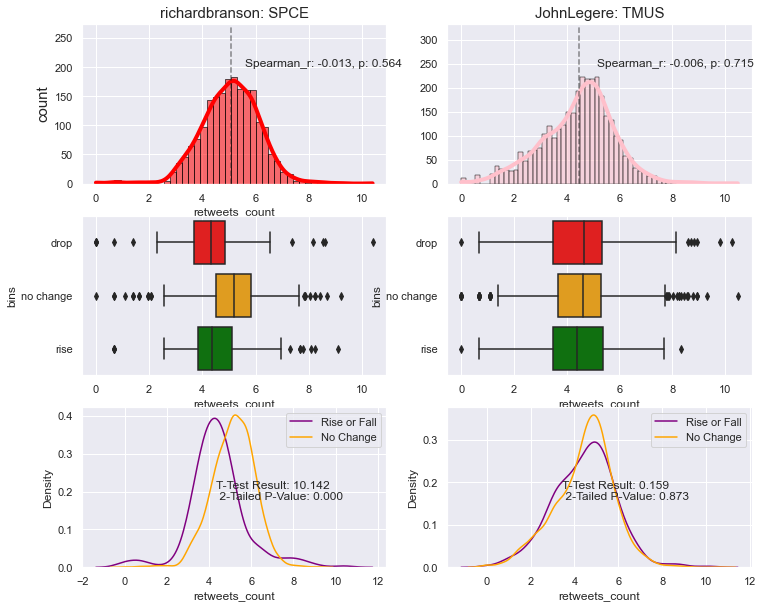

retweets_count 
 
 
 
 
 mean 
 5.058233 
 
 
 std 
 1.083018 
 
 
 min 
 0.000000 
 
 
 25% 
 4.382027 
 
 
 50% 
 5.093750 
 
 
 75% 
 5.786897 
 
 
 max 
 10.393876 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 4 
 0.002 
 
 
 btwn_0_1_std 
 10 
 0.005 
 
 
 btwn_1_2_std 
 10 
 0.005 
 
 
 over_2_std 
 1989 
 0.99 
 
 
 
 
 
 
 retweets_count 
 
 
 
 
 mean 
 4.454154 
 
 
 std 
 1.361236 
 
 
 min 
 0.000000 
 
 
 25% 
 3.610918 
 
 
 50% 
 4.615121 
 
 
 75% 
 5.313206 
 
 
 max 
 10.490079 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 11 
 0.003 
 
 
 btwn_0_1_std 
 48 
 0.014 
 
 
 btwn_1_2_std 
 331 
 0.099 
 
 
 over_2_std 
 2972 
 0.887

In [29]:
df = tweet_stocks.copy()
feature = features[7]
df[feature] += 1
df[feature] = np.log(df[feature])
display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(311)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=False, spearmanr=True, truncate=False)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)


plt.subplot(312)

sns.boxplot(data=df, x = feature, y = 'bins', palette=['red', 'orange', 'green'])

plt.subplot(313)
result, p_val = ttest_ind(df[feature][df['bins'] == 'no change'], df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], equal_var = True)
sns.kdeplot(df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], color='purple' ,alpha=0.3)
sns.kdeplot(df[feature][df['bins'] == 'no change'], color='orange', alpha=0.3)
plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.45, .15), xycoords='figure fraction')
plt.legend(['Rise or Fall', 'No Change'])

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(321)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=False, spearmanr=True, truncate=False)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(322)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=False, spearmanr=True, truncate=False)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')
    
    plt.subplot(323)
    sns.boxplot(data=df[df['username']==mapper[i][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    plt.subplot(324)
    sns.boxplot(data=df[df['username']==mapper[j][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    
    plt.subplot(325)
    
    df_usn = df[df['username']==mapper[i][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.25, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])
    
    plt.subplot(326)
    
    df_usn = df[df['username']==mapper[j][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.65, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])


    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2


likes_count 
 
 
 
 
 mean 
 7.193010 
 
 
 std 
 2.162361 
 
 
 min 
 0.000000 
 
 
 25% 
 5.968708 
 
 
 50% 
 6.879870 
 
 
 75% 
 7.943339 
 
 
 max 
 15.368865 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 6 
 0.001 
 
 
 btwn_0_1_std 
 91 
 0.008 
 
 
 btwn_1_2_std 
 596 
 0.051 
 
 
 over_2_std 
 11051 
 0.941

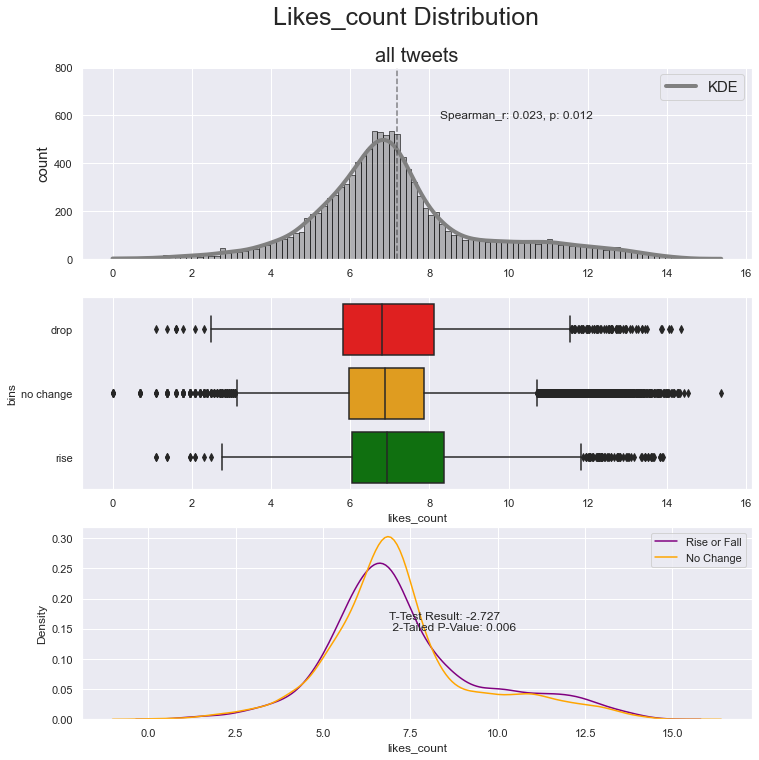

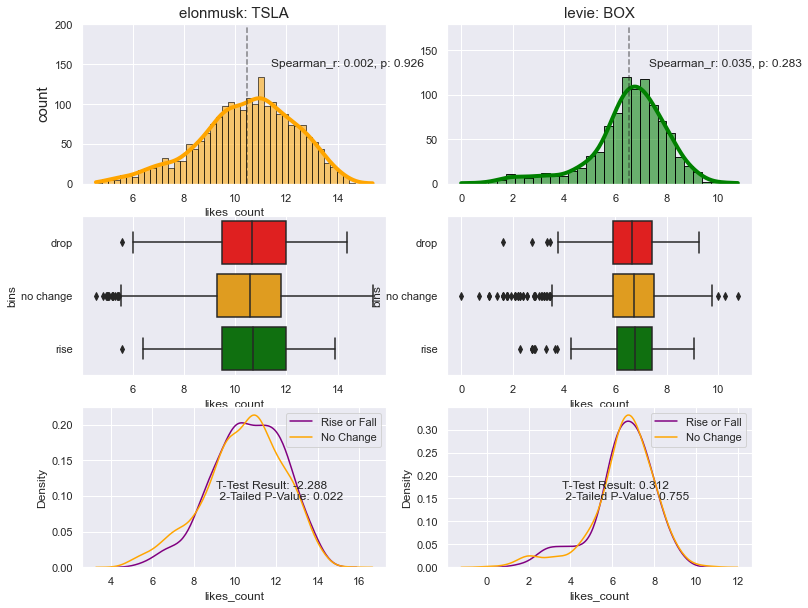

likes_count 
 
 
 
 
 mean 
 10.472624 
 
 
 std 
 1.878236 
 
 
 min 
 4.564348 
 
 
 25% 
 9.310638 
 
 
 50% 
 10.628836 
 
 
 75% 
 11.839355 
 
 
 max 
 15.368865 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 2157 
 1.0 
 
 
 
 
 
 
 likes_count 
 
 
 
 
 mean 
 6.536615 
 
 
 std 
 1.513626 
 
 
 min 
 0.000000 
 
 
 25% 
 5.917541 
 
 
 50% 
 6.717805 
 
 
 75% 
 7.488293 
 
 
 max 
 10.766652 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 1 
 0.001 
 
 
 btwn_0_1_std 
 5 
 0.005 
 
 
 btwn_1_2_std 
 35 
 0.037 
 
 
 over_2_std 
 903 
 0.958

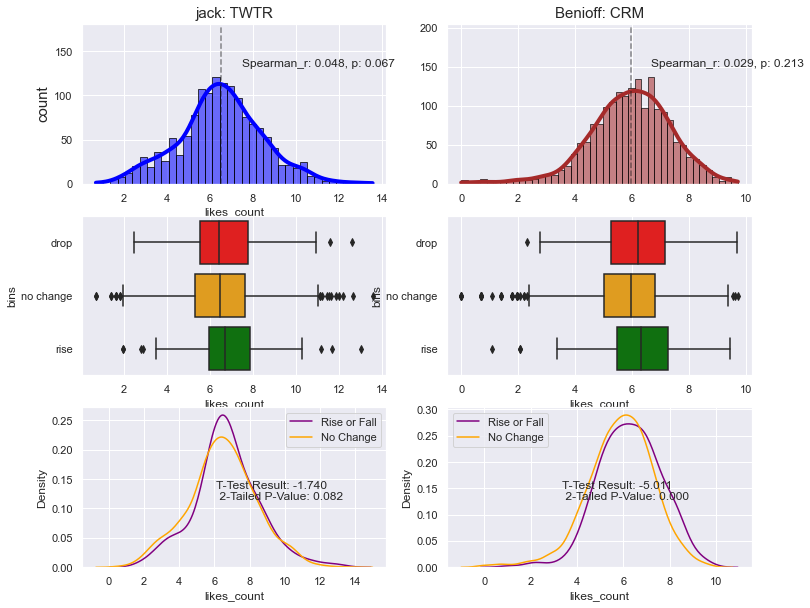

likes_count 
 
 
 
 
 mean 
 6.500099 
 
 
 std 
 1.936212 
 
 
 min 
 0.693147 
 
 
 25% 
 5.384495 
 
 
 50% 
 6.495266 
 
 
 75% 
 7.635545 
 
 
 max 
 13.564961 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 9 
 0.006 
 
 
 btwn_1_2_std 
 131 
 0.091 
 
 
 over_2_std 
 1302 
 0.903 
 
 
 
 
 
 
 likes_count 
 
 
 
 
 mean 
 5.946690 
 
 
 std 
 1.416690 
 
 
 min 
 0.000000 
 
 
 25% 
 5.104426 
 
 
 50% 
 6.014936 
 
 
 75% 
 6.884742 
 
 
 max 
 9.715047 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 4 
 0.002 
 
 
 btwn_0_1_std 
 15 
 0.008 
 
 
 btwn_1_2_std 
 34 
 0.019 
 
 
 over_2_std 
 1787 
 0.973

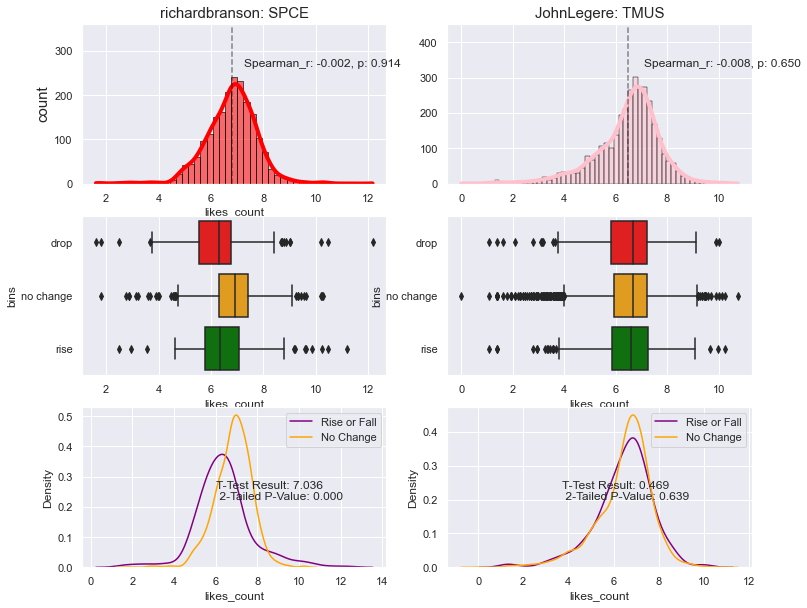

likes_count 
 
 
 
 
 mean 
 6.791607 
 
 
 std 
 0.966642 
 
 
 min 
 1.609438 
 
 
 25% 
 6.228511 
 
 
 50% 
 6.850126 
 
 
 75% 
 7.393263 
 
 
 max 
 12.164125 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 3 
 0.001 
 
 
 over_2_std 
 2006 
 0.999 
 
 
 
 
 
 
 likes_count 
 
 
 
 
 mean 
 6.488352 
 
 
 std 
 1.223649 
 
 
 min 
 0.000000 
 
 
 25% 
 5.922917 
 
 
 50% 
 6.687109 
 
 
 75% 
 7.240291 
 
 
 max 
 10.751350 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 1 
 0.0 
 
 
 btwn_0_1_std 
 4 
 0.001 
 
 
 btwn_1_2_std 
 26 
 0.008 
 
 
 over_2_std 
 3321 
 0.991

In [30]:
df = tweet_stocks.copy()
feature = features[8]
df[feature] += 1
df[feature] = np.log(df[feature])
display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(311)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=False, spearmanr=True, truncate=False)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)


plt.subplot(312)

sns.boxplot(data=df, x = feature, y = 'bins', palette=['red', 'orange', 'green'])

plt.subplot(313)
result, p_val = ttest_ind(df[feature][df['bins'] == 'no change'], df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], equal_var = True)
sns.kdeplot(df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], color='purple' ,alpha=0.3)
sns.kdeplot(df[feature][df['bins'] == 'no change'], color='orange', alpha=0.3)
plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.45, .15), xycoords='figure fraction')
plt.legend(['Rise or Fall', 'No Change'])

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(321)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=False, spearmanr=True, truncate=False)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(322)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=False, spearmanr=True, truncate=False)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')
    
    plt.subplot(323)
    sns.boxplot(data=df[df['username']==mapper[i][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    plt.subplot(324)
    sns.boxplot(data=df[df['username']==mapper[j][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    
    plt.subplot(325)
    
    df_usn = df[df['username']==mapper[i][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.25, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])
    
    plt.subplot(326)
    
    df_usn = df[df['username']==mapper[j][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.65, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])


    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2


number of tweets 
 
 
 
 
 mean 
 1.553622 
 
 
 std 
 0.777026 
 
 
 min 
 0.693147 
 
 
 25% 
 0.693147 
 
 
 50% 
 1.386294 
 
 
 75% 
 2.079442 
 
 
 max 
 5.093750 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 3143 
 0.268 
 
 
 btwn_1_2_std 
 3223 
 0.275 
 
 
 over_2_std 
 5372 
 0.458

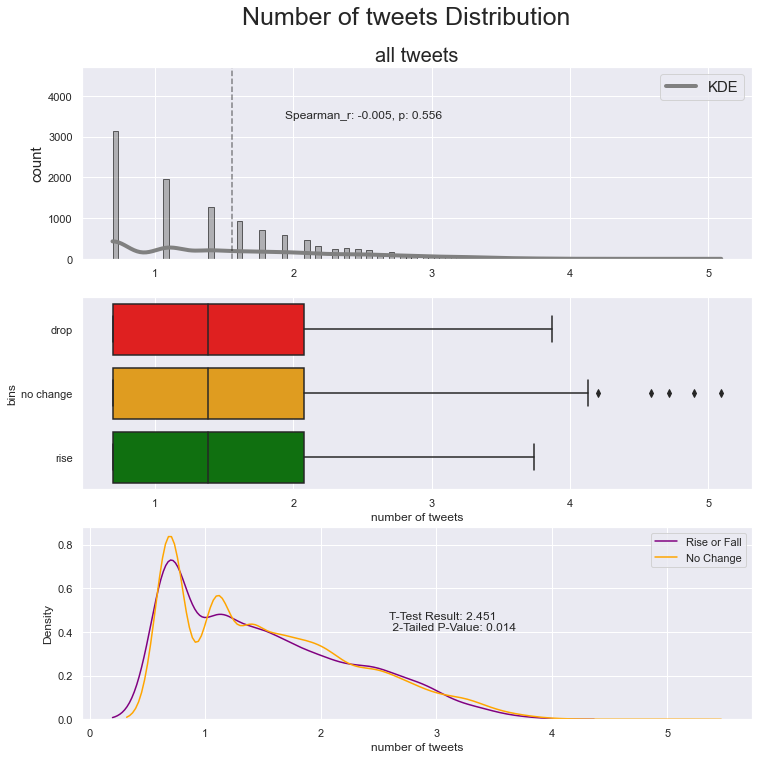

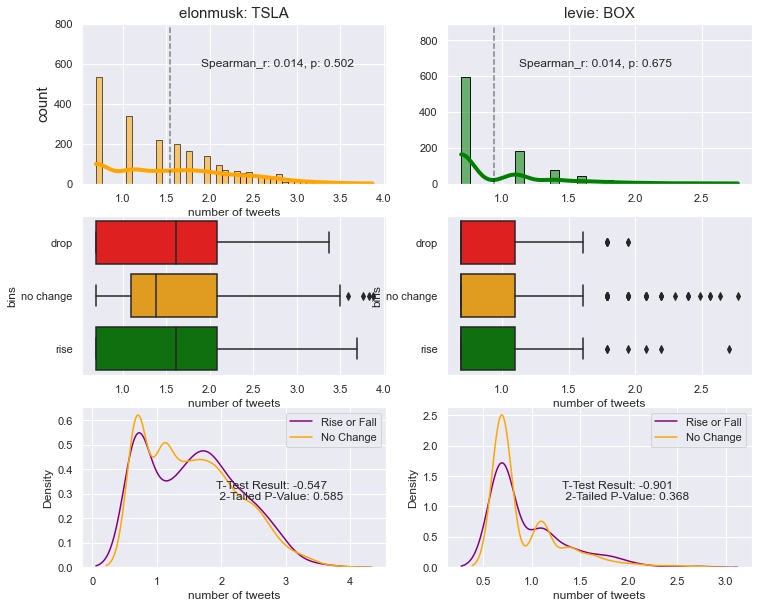

number of tweets 
 
 
 
 
 mean 
 1.549553 
 
 
 std 
 0.710299 
 
 
 min 
 0.693147 
 
 
 25% 
 1.098612 
 
 
 50% 
 1.386294 
 
 
 75% 
 2.079442 
 
 
 max 
 3.871201 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 534 
 0.248 
 
 
 btwn_1_2_std 
 558 
 0.259 
 
 
 over_2_std 
 1065 
 0.494 
 
 
 
 
 
 
 number of tweets 
 
 
 
 
 mean 
 0.938919 
 
 
 std 
 0.384824 
 
 
 min 
 0.693147 
 
 
 25% 
 0.693147 
 
 
 50% 
 0.693147 
 
 
 75% 
 1.098612 
 
 
 max 
 2.772589 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 594 
 0.63 
 
 
 over_2_std 
 349 
 0.37

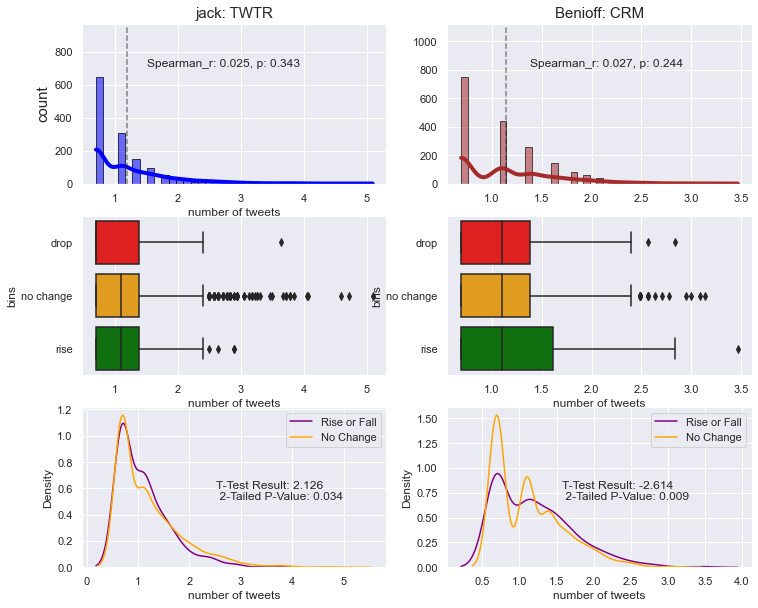

number of tweets 
 
 
 
 
 mean 
 1.185190 
 
 
 std 
 0.627839 
 
 
 min 
 0.693147 
 
 
 25% 
 0.693147 
 
 
 50% 
 1.098612 
 
 
 75% 
 1.386294 
 
 
 max 
 5.093750 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 952 
 0.66 
 
 
 over_2_std 
 490 
 0.34 
 
 
 
 
 
 
 number of tweets 
 
 
 
 
 mean 
 1.139863 
 
 
 std 
 0.478610 
 
 
 min 
 0.693147 
 
 
 25% 
 0.693147 
 
 
 50% 
 1.098612 
 
 
 75% 
 1.386294 
 
 
 max 
 3.465736 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 749 
 0.408 
 
 
 over_2_std 
 1087 
 0.592

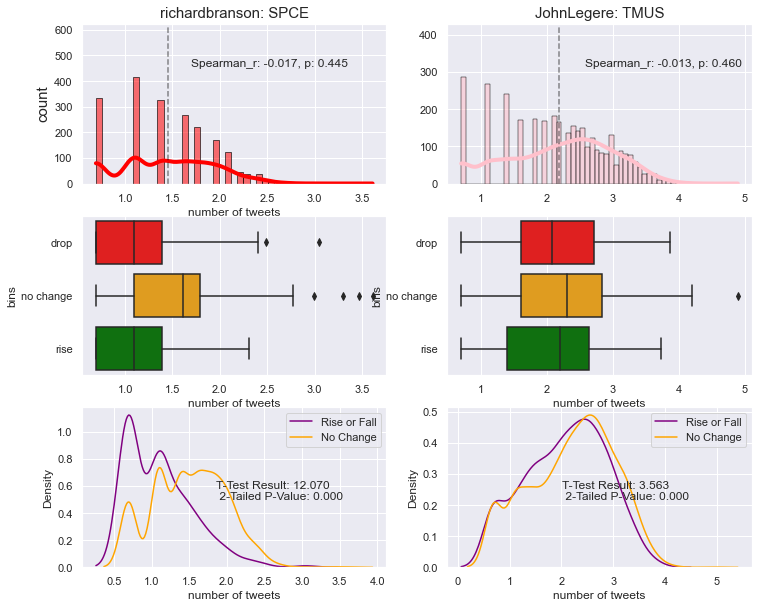

number of tweets 
 
 
 
 
 mean 
 1.448402 
 
 
 std 
 0.499097 
 
 
 min 
 0.693147 
 
 
 25% 
 1.098612 
 
 
 50% 
 1.386294 
 
 
 75% 
 1.791759 
 
 
 max 
 3.610918 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 334 
 0.166 
 
 
 over_2_std 
 1675 
 0.834 
 
 
 
 
 
 
 number of tweets 
 
 
 
 
 mean 
 2.177547 
 
 
 std 
 0.806227 
 
 
 min 
 0.693147 
 
 
 25% 
 1.609438 
 
 
 50% 
 2.302585 
 
 
 75% 
 2.772589 
 
 
 max 
 4.897840 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 286 
 0.085 
 
 
 btwn_1_2_std 
 679 
 0.203 
 
 
 over_2_std 
 2386 
 0.712

In [31]:
df = tweet_stocks.copy()
feature = features[9]

df[feature] += 1
df[feature] = np.log(df[feature])
display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(311)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=False, spearmanr=True, truncate=False)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)


plt.subplot(312)

sns.boxplot(data=df, x = feature, y = 'bins', palette=['red', 'orange', 'green'])

plt.subplot(313)
result, p_val = ttest_ind(df[feature][df['bins'] == 'no change'], df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], equal_var = True)
sns.kdeplot(df[feature][(df['bins'] == 'drop') | (df['bins'] == 'rise')], color='purple' ,alpha=0.3)
sns.kdeplot(df[feature][df['bins'] == 'no change'], color='orange', alpha=0.3)
plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.45, .15), xycoords='figure fraction')
plt.legend(['Rise or Fall', 'No Change'])

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(321)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=False, spearmanr=True, truncate=False)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(322)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=False, spearmanr=True, truncate=False)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')
    
    plt.subplot(323)
    sns.boxplot(data=df[df['username']==mapper[i][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    plt.subplot(324)
    sns.boxplot(data=df[df['username']==mapper[j][0]], x = feature, y = 'bins', palette=['red', 'orange', 'green'])
    
    plt.subplot(325)
    
    df_usn = df[df['username']==mapper[i][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.25, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])
    
    plt.subplot(326)
    
    df_usn = df[df['username']==mapper[j][0]].copy()
    
    result, p_val = ttest_ind(df_usn[feature][df_usn['bins'] == 'no change'], df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], equal_var = True)
    sns.kdeplot(df_usn[feature][(df_usn['bins'] == 'drop') | (df_usn['bins'] == 'rise')], color='purple' ,alpha=0.3)
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'no change'], color='orange', alpha=0.3)
    plt.annotate('T-Test Result: {:.3f} \n 2-Tailed P-Value: {:.3f}'.format(result, p_val), (.65, .15), xycoords='figure fraction')
    plt.legend(['Rise or Fall', 'No Change'])


    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2


In [160]:
tweet_stocks.to_pickle(f'/Users/tylerpoore/Workspace/Spring Board/Projects/Capstone_notebooks/Capstone_1_Final/data/tweet_stocks_EDA.pkl')